# FINAL PROJECT - DRUG CONSUMPTION ANALYSIS

### DIA 5 
### Cyprien NICOLAY - Timothé VITAL - Anna ZENOU

# 0_Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


#### Nommer explicitement les colonnes : 

In [2]:
#names = ['ID', 'Age', 'Genre', 'Education', 'Pays', 'Ethnicité', 'Neuroticisme', 'Extraversion', 'Ouverture', 'Agréabilité', 'Sérieux', 'Impulsivité', 'Recherche_de_sensation', 'Alcool', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolat', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Drogues_légales', 'LSD', 'Methadone', 'Champignon', 'Nicotine', 'Semeron', 'Abus']
col_démographie=['ID', 'Age', 'Genre', 'Education', 'Pays', 'Ethnicité']
col_personnalité=['Neuroticisme', 'Extraversion', "Ouverture à l'expérience", 'Agréabilité', 'Sérieux', 'Impulsivité', 'Recherche de sensation']
col_drogue=['Alcool', 'Amphetamine', 'Amyl nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolat', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Substance psychoactive', 'LSD', 'Methadone', 'Champignon hallucinogène', 'Nicotine', 'Semeron', 'Substance Volatile']
#La Séparation entre drogues légales et illégales pourrait être utile plus tard
col_drogue_légale=['Alcool', 'Caffeine', 'Chocolat', 'Nicotine']
col_drogue_illégale=['Amphetamine', 'Amyl nitrite', 'Benzodiazepine', 'Cannabis', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Substance psychoactive', 'LSD', 'Methadone', 'Champignon hallucinogène', 'Semeron','Substance Volatile']
colonnes=col_démographie+col_personnalité+col_drogue

In [3]:
#Version d'Anna :
data = pd.read_csv(r'C:\Users\annaz\Desktop\A4\PYTHON FOR DATA ANALYSIS\Final Project\drug_consumption.data', names = colonnes)
#Version de Cyprien :
#data=data = pd.read_csv(r'C:\Users\Cyprien\OneDrive - De Vinci\Documents\ESILV\A4\Python for data analysis\Final project\drug_consumption.data', names = colonnes)
#Version de Timothé :

pd.set_option('display.max_columns', 50)
#data.set_index('ID', inplace = True)
data

,ID,Age,Genre,Education,Pays,Ethnicité,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Semeron,Substance Volatile
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
df = data.copy()

# 1_Data Pre-processing

### Explication et modification des colonnes

Les données numériques sont déjà normalisées.

Le dataset sur la consommation de drogues (quantifiée) est un dataset multi-label du UCI machine learning repository.

Le dataset contient des réponses pour 1885 répondants.

Pour résumer, il contient :

* une colonne ID
* 5 colonnes démographiques (caractéristiques)
* 7 traits de personnalité (caractéristiques)
* 18 drogues avec leur fréquence d'utilisation (cible)
* une fausse drogue appelée Semeron pour vérifier la fiabilité des réponses.

Chaque variable de drogue peut prendre 6 valeurs différentes :

* CL0 : Jamais utilisée
* CL1 : Utilisée il y a plus d'une décennie
* CL2 : Utilisée au cours de la dernière décennie
* CL3 : Utilisée au cours de la dernière année
* CL4 : Utilisée au cours du dernier mois
* CL5 : Utilisée au cours de la dernière semaine
* CL6 : Utilisée au cours du dernier jour

Toutes les variables qualitatives ont été transformées en valeurs réelles (sauf les variables cibles).

### Cleaning Data

In [5]:
data.shape

(1885, 32)

#### Check for missing values

In [6]:
data.isnull().values.any()

False

Il n'y a pas de donnée manquante.

#### Overclaimers

Semeron est une drogue fictive qui a été introduite pour identifier les revandications excessives.
Ces personnes seront exclues du dataset afin d'éviter des prédictions et des analyses inexactes, car leurs autres réponses pourraient également être erronées.

In [7]:
overclaimers = data[data['Semeron'] != 'CL0']
overclaimers
# There are 8 people who claimed they used Semeron, the fictitious drug.

,ID,Age,Genre,Education,Pays,Ethnicité,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Semeron,Substance Volatile
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [8]:
#On enlève les lignes correspondantes aux personnes ayant répondu avoir consommé du Semeron
data = data[data['Semeron'] == 'CL0']
#On enlève Semeron des listes de colonnes
col_drogue.remove('Semeron')
col_drogue_illégale.remove('Semeron')
#On supprime la colonne Semeron de la base de donnée
data.drop(['Semeron'], axis=1,inplace = True)

data.shape

(1877, 31)

#### Colonne ID

In [9]:
data.set_index('ID', inplace = True)
col_démographie.remove('ID')

#### Colonnes pays et ethnicité

In [10]:
data['Ethnicité'].value_counts()

-0.31685    1715
 0.11440      62
-1.10702      33
-0.50212      25
 0.12600      20
-0.22166      19
 1.90725       3
Name: Ethnicité, dtype: int64

In [11]:
data['Pays'].value_counts()

 0.96082    1044
-0.57009     551
-0.28519     118
 0.24923      87
-0.09765      52
 0.21128      20
-0.46841       5
Name: Pays, dtype: int64

Le pays et l'ethnicité ne sont pas des critères suffisant pour tirer une analyse ou une prédiction pertinente car les pays autres que USA et UK représentent toutes moins de 5% individuellement, et les éthnicités autres que 'Blancs' représentent toutes moins de 2% individuellement.

In [12]:
data.drop(['Pays'], axis=1,inplace = True)
col_démographie.remove('Pays')
data.drop(['Ethnicité'], axis=1,inplace = True)
col_démographie.remove('Ethnicité')
data.columns

Index(['Age', 'Genre', 'Education', 'Neuroticisme', 'Extraversion',
       'Ouverture à l'expérience', 'Agréabilité', 'Sérieux', 'Impulsivité',
       'Recherche de sensation', 'Alcool', 'Amphetamine', 'Amyl nitrite',
       'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolat', 'Cocaine',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Substance psychoactive',
       'LSD', 'Methadone', 'Champignon hallucinogène', 'Nicotine',
       'Substance Volatile'],
      dtype='object')

#### Colonne genre

On modifie la colonne de sorte à avoir la valeur 0 si il s'agit d'une femme et 1 si il s'agit d'un homme

In [13]:
def genre(x):
    if (x == 0.48246 ):
        x = 0
    elif (x == -0.48246 ):
        x = 1
    return x

data['Genre'] = data['Genre'].map(genre)
data.head()

,Age,Genre,Education,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
2,-0.07854,1,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
3,0.49788,1,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
4,-0.95197,0,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
5,0.49788,0,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


#### Encode drug columns into numeric data

In [14]:
for column in col_drogue:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

In [15]:
for column in col_drogue:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
for column in col_démographie:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
for column in col_personnalité:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [16]:
df

,ID,Age,Genre,Education,Pays,Ethnicité,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Semeron,Substance Volatile
0,1,2,1,5,0.96082,0.12600,27,19,16,17,24,3,2,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,CL0,0
1,2,1,0,8,0.96082,-0.31685,17,35,29,28,23,2,5,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,CL0,0
2,3,2,0,5,0.96082,-0.31685,19,28,14,12,16,1,7,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,CL0,0
3,4,0,1,7,0.96082,-0.31685,22,17,20,27,28,1,2,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,CL0,0
4,5,2,1,8,0.96082,-0.31685,31,11,17,21,32,3,5,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,CL0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,0,1,4,-0.57009,-0.31685,13,34,31,28,15,6,10,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,CL0,5
1881,1885,0,0,4,-0.57009,-0.31685,21,34,24,28,12,6,8,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,CL0,0
1882,1886,1,1,6,-0.57009,-0.31685,35,13,11,11,13,5,4,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,CL0,0
1883,1887,0,1,4,-0.57009,-0.31685,33,9,22,12,4,7,9,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,CL0,0


In [17]:
data.head()

,Age,Genre,Education,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0
2,-0.07854,1,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
3,0.49788,1,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
4,-0.95197,0,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
5,0.49788,0,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0


### Pre-processsing pour la classification

A partir de cette base de donnée on identifie deux problémes de classification : quelles types de personnes sont sujettes à avoir déjà testé telle drogue (CL0 vs autres), et quelles types de peresonnes sont sujettes à consommer telle drogue régulièrement (CL5+CL6 vs autres).

On décide de se concentrer sur le deuxième modèle.
Nous allons ainsi attribuer la valeur 1 aux individus qui consomme régulièrement une drogue (CL5 et CL6) et la valeur 0 aux autres (CL0 à 4).

In [18]:
def tester(f):
    if ((f==6) or (f==5)  or (f==4)  or (f==3)  or (f==2)  or (f==1)):
        f = 1
    elif (f==0):
        f = 0
    return f

def regulier(f):
    if ((f==6) or (f==5)):
        f = 1
    elif ((f==0) or (f==1) or (f==2) or (f==3) or (f==4)):
        f = 0
    return f

In [19]:
data_test=data.copy()
for col in col_drogue:
    data_test[col]=data_test[col].map(tester)
data_test.head()

,Age,Genre,Education,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-0.07854,1,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0
3,0.49788,1,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
4,-0.95197,0,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0
5,0.49788,0,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0


#### Colonnes Age et Education : One Hot Encoding

Pour mieux comprendre la colonne age et éducation, au lieu de donner une valeur à chaque tranche d'âge ce qui pourrait influencer injustement les algorithmes de prédiction du fait qu'elles ne soient pas ordinales, on propose de faire une collone T/F pour chaque valeur possible (one-hot encoding). La fonction OneHotEncoder de la bibliothèque sklearn.preprocessing peut réaliser cette tâche mais on est parvenu plus facilement au résultat avec la fonction get_dummies.

In [20]:
oh_data= pd.get_dummies(data_test, columns = ['Age', 'Education'])
oh_data.head()

,Genre,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age_-0.95197,Age_-0.07854,Age_0.49788,Age_1.09449,Age_1.82213,Age_2.59171,Education_-2.43591,Education_-1.7379,Education_-1.43719,Education_-1.22751,Education_-0.61113,Education_-0.05921,Education_0.45468,Education_1.16365,Education_1.98437
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


On peut au passage faire le tri : d'après les informations fournies sur les attributs : les 65+ ne représentent que 0.95% de la base de donnée, pour ce qui est de l'éducation on peut regrouper les décrochage avant 16 ans et les décrochage à 16 ans qui représent 1.5% et 5%, et de même regrouper les décrochages à 17 et 18 ans.

In [21]:
oh_data.drop(['Age_2.59171'], axis=1,inplace = True)

oh_data.rename(columns = {'Age_-0.95197':'Age: 18-24',
                          'Age_-0.07854':'Age: 25-34',
                          'Age_0.49788':'Age: 35-44',
                          'Age_1.09449':'Age: 45-54',
                          'Age_1.82213':'Age: 55-64',
                          'Education_-2.43591':'Décrochage avant 16 ans',
                          'Education_-1.7379':'Décrochage à 16 ans',
                          'Education_-1.43719':'Décrochage à 17 ans',
                          'Education_-1.22751':'Décrochage à 18 ans',
                          'Education_-0.61113':'Ecole supérieure ou Université',
                          'Education_-0.05921':'Certificat professionnel',
                          'Education_0.45468':'Diplômé universitaire',
                          'Education_1.16365':'Diplômé de master',
                          'Education_1.98437':'Diplômé de doctorat'
                         }, inplace = True)
oh_data.head()

,Genre,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Age: 25-34,Age: 35-44,Age: 45-54,Age: 55-64,Décrochage avant 16 ans,Décrochage à 16 ans,Décrochage à 17 ans,Décrochage à 18 ans,Ecole supérieure ou Université,Certificat professionnel,Diplômé universitaire,Diplômé de master,Diplômé de doctorat
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


# 2_Data Visualization

#### Description des caractéristiques démographiques et de personnalité

In [22]:
data.describe()

,Age,Genre,Education,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.037577,0.500799,-0.000984,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,1.337773,0.606819,1.461907,5.484283,2.980288,5.109750,1.156633,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409
std,0.878387,0.500133,0.949831,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,1.782384,1.064005,1.869193,1.115119,2.286778,1.085716,1.510791,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160
min,-0.951970,0.000000,-2.435910,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.951970,0.000000,-0.611130,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-0.078540,1.000000,-0.059210,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,0.497880,1.000000,0.454680,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,2.591710,1.000000,1.984370,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


Pour que ces résultats soit plus lisibles et parlant, affichons-les sous forme de Box plots.
On remarquera que les valeurs des colonnes des caractéristiques des individus sont centrées autour de 0. Les données ont donc été standardisées.

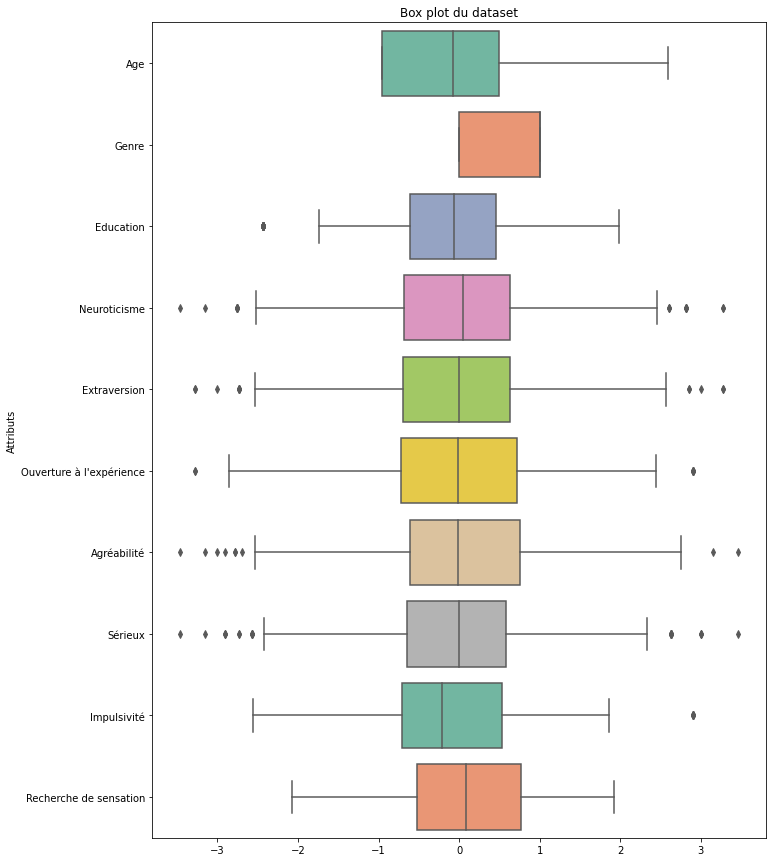

In [23]:
fig, ax = plt.subplots(figsize=(11,15))
plt.ylabel("Attributs")
plt.title("Box plot du dataset")
ax = sns.boxplot(data = data[['Age', 'Genre', 'Education']+col_personnalité], orient="h", palette="Set2")
sns.reset_orig()

### Visualisation des proportions pour chaque caractéristique démographique et de personnalité

In [24]:
def visu(data, col):
    plt.rc('font', size=10)
    colors = sns.color_palette('pastel')
    fig,axes = plt.subplots(1,2, figsize=(20,5))
    data[col].value_counts().sort_index().plot.pie(colors = colors, 
                                             ax=axes[0],
                                             title=f'Pie Chart : {col}',
                                             autopct='%.2f%%',
                                             ylabel='')
    data[col].value_counts().sort_index().plot.bar(color = colors, 
                                             ax=axes[1],
                                             title=f'Bar Chart : {col}',
                                             ylabel='')
    plt.show()


#### Caractéristiques démographiques
##### Rappel des différentes catégories : 
###### Age : 
* 0 : 18-24 ans
* 1 : 25-34 ans
* 2 : 35-44 ans
* 3 : 45-54 ans
* 4 : 55-64 ans
* 5 : 65+ ans

###### Education : 
* 0 : Left school before 16 years 
* 1 : Left school at 16 years 
* 2 : Left school at 17 years
* 3 : Left school at 18 years 
* 4 : Some college or university, no certificate or degree
* 5 : Professional certificate/ diploma 
* 6 : University degree
* 7 : Masters degree 
* 8 : Doctorate degree



###### Genre : 
* 0 : homme
* 1 : femme

###### Pays : 
* 0 : USA
* 1 : New Zealand
* 2 : Other
* 3 : Australia
* 4 : Republic of Ireland
* 5 : Canada
* 6 : UK

###### Ethnicité : 
* 0 : Black
* 1 : Asian
* 2 : White
* 3 : Mixed-White/Asian
* 4 : Other 
* 5 : Mixed-White/Black
* 6 : Mixed-Black/Asian

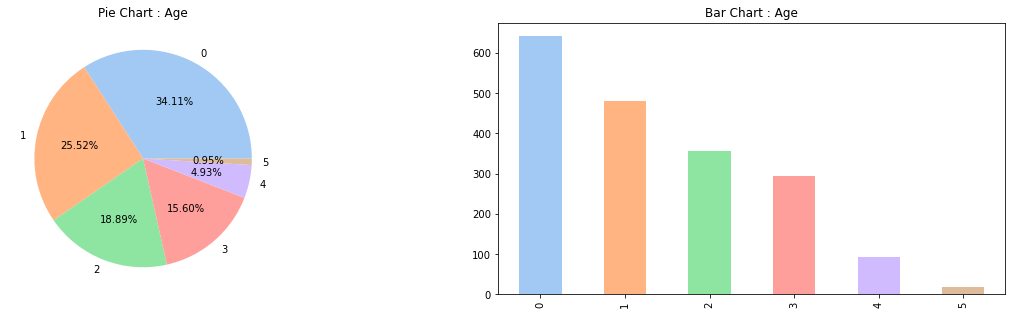

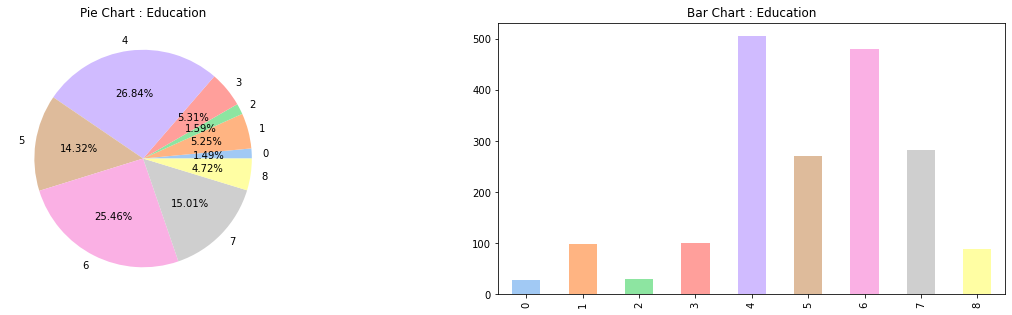

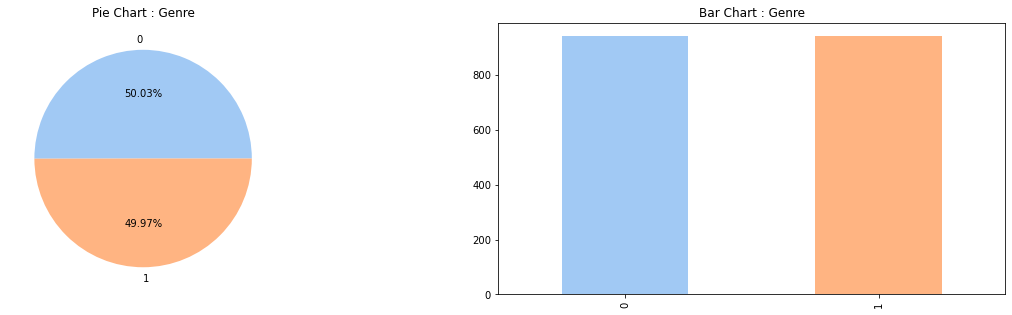

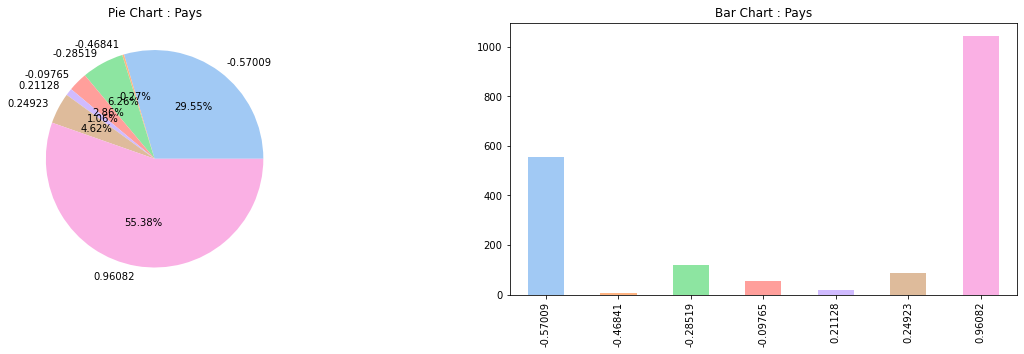

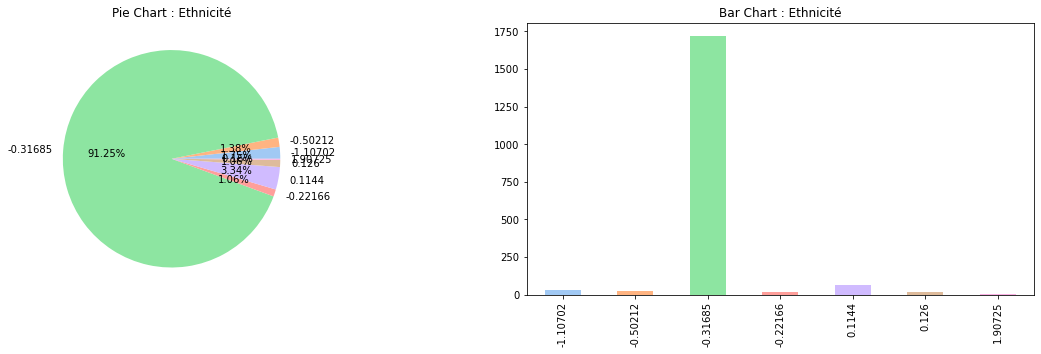

In [25]:
visu(df, 'Age')
visu(df, 'Education')
visu(df, 'Genre')
visu(df, 'Pays')
visu(df, 'Ethnicité')

Grâce à ces graphiques, nous pouvons tirer plusieurs informations des colonnes des caractéristiques démographiques :
* Age : il y a largement plus de participants jeunes, plus l'age augmentes, moins il y a d'individus qui représentent la tranche d'âge. Les plus de 55 ans notamment ne sont pas bien représentés (5% pour la tranche d'âge 55-64 ans et 1% pour les + de 65 ans). Alors que le groupe des 18-24 ans représente 34% des participants. L'âge n'est donc pas très représentatif dans ce dataset car on a une tranche d'âge prédominante.

* Education : la majorité des répondants du dataset ont une éducation (les catégories 4 à 8 représentent environ 85%). Ce n'est donc pas très équilibré et réprésentatif des autres catégories mais on peut supposer que ces proportions sont proches de la réalité dans les pays des participants (USA et UK principalement).

* Genre : il y a presque autant d'hommes que de femmes (quasiment 50% de chaque), les genres sont donc bien représentatifs.

* Pays : le pays n'est pas un critères assez représentatif car les pays autres que USA et UK représentent tous moins de 5%.

* Ethnicité : comme pour les pays, les ethnicité autres que 'Blanc représentent toutes moins de 2%. 

On utilisera donc le dataset sans ces les colonnes Pays et Ethnicité.

#### Caractéristiques de personnalité

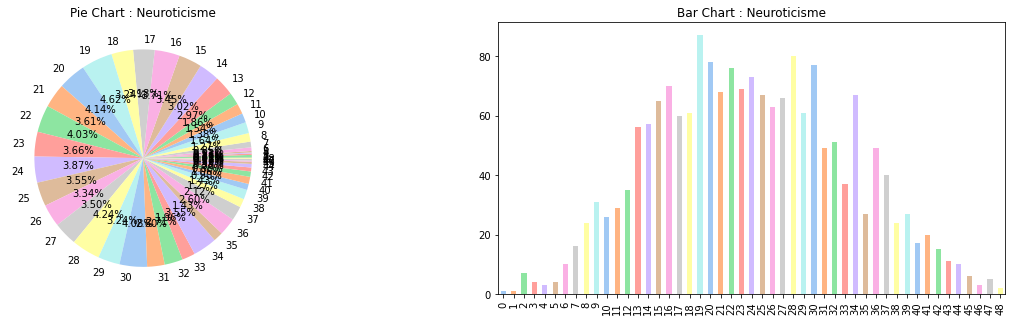

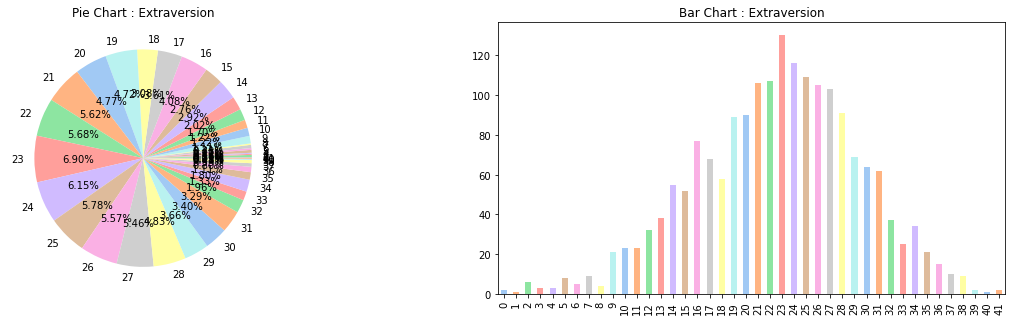

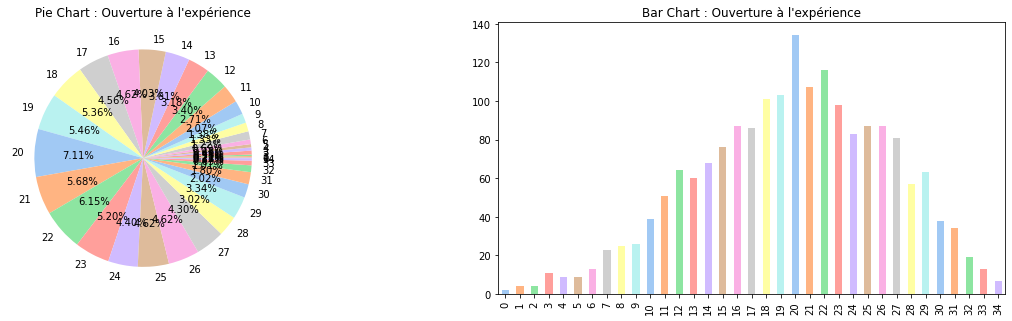

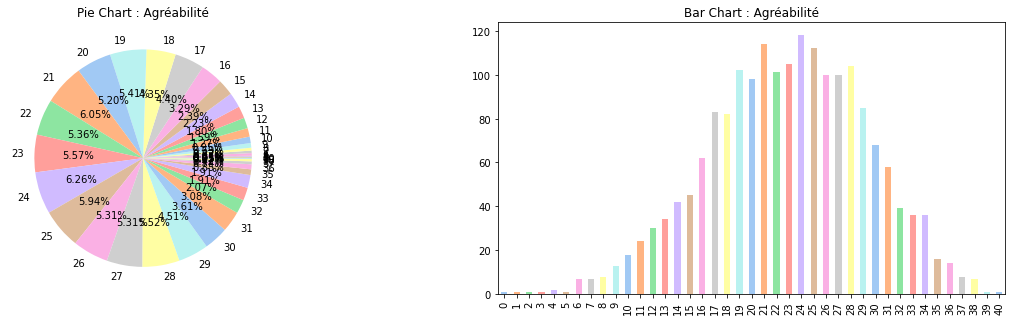

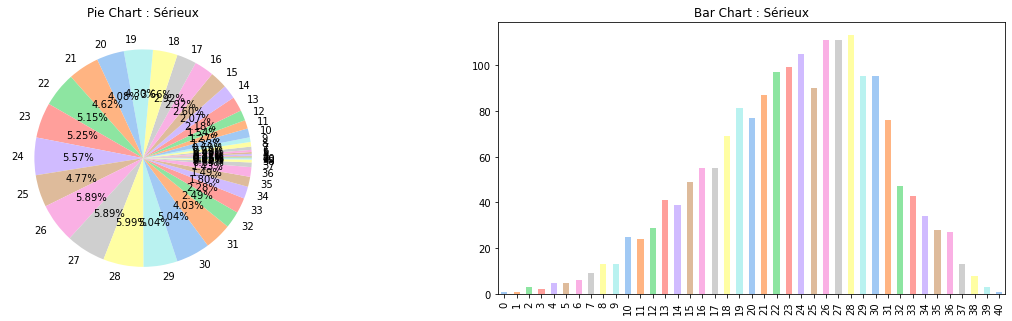

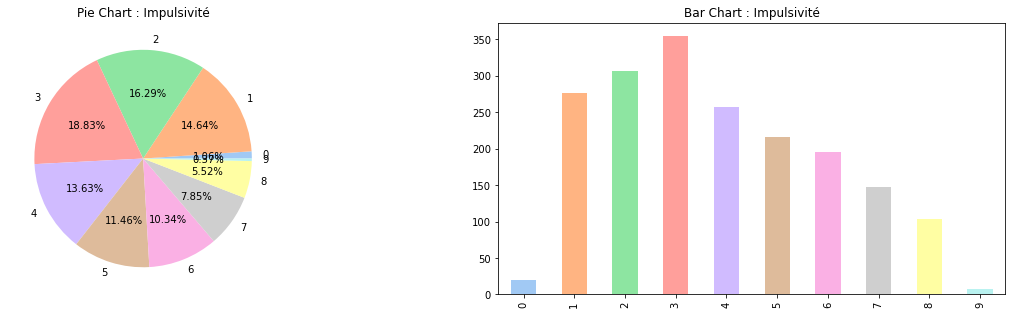

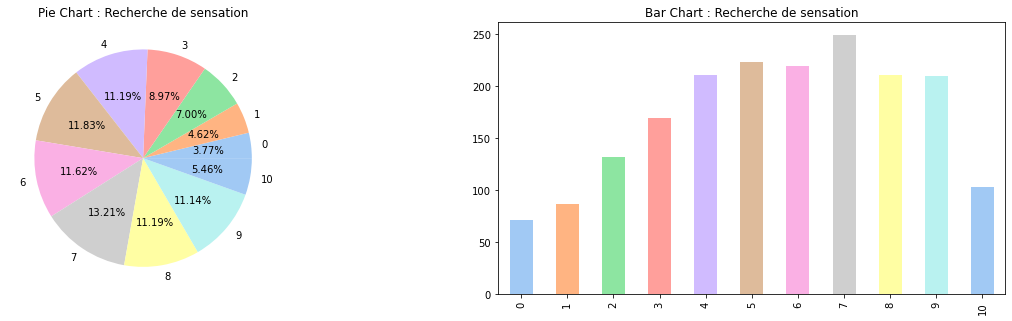

In [26]:
visu(df, 'Neuroticisme')
visu(df, 'Extraversion')
visu(df, 'Ouverture à l\'expérience')
visu(df, 'Agréabilité')
visu(df, 'Sérieux')
visu(df, 'Impulsivité')
visu(df, 'Recherche de sensation')

Ces graphes sont difficiles à interpréter car il y a plusieurs niveaux pour ces traits de personnalité. On remarque toutefois grâce aux pie charts qu' il ne semble pas y avoir de déséquilibre important.

#### Corrélation entre les différents traits de personnalité

<AxesSubplot:>

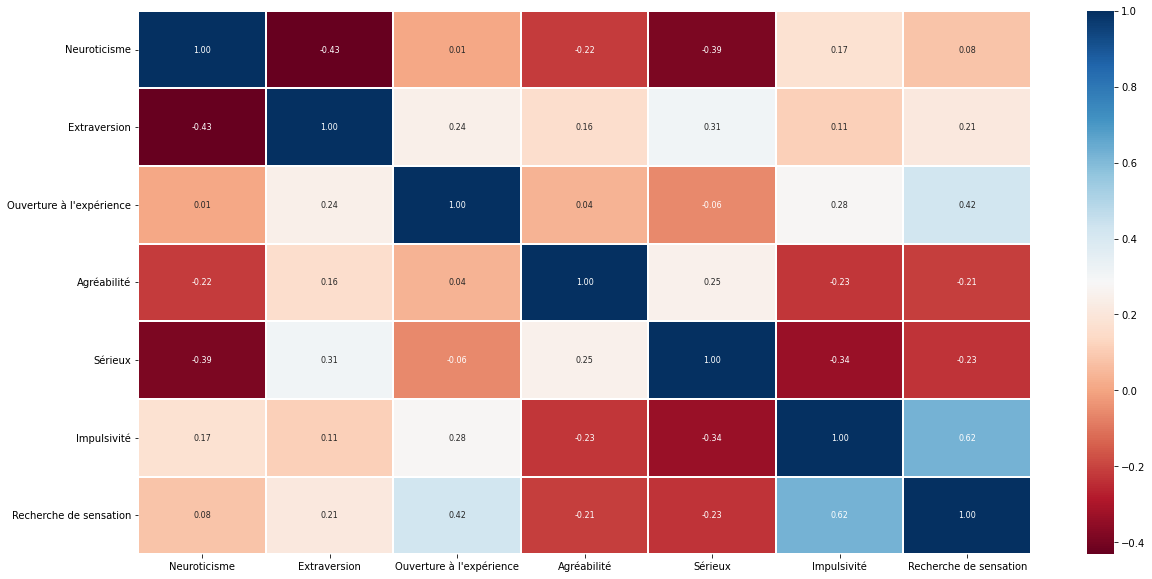

In [27]:
corr = data[col_personnalité].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdBu',annot=True, annot_kws={"fontsize":8}, linewidth = 0.1, fmt='.2f')

Aucune corrélation forte, mais quelques corrélations modérées. Le signe de la corrélation peut être intéressant à prendre en compte.

Le neuroticisme, par exemple, a peu de corrélations positives avec les autres traits de personnalité. Il présente une corrélation descendante faible-modérée avec l'extraversion et le sérieux.

#### Visualisation du nombre de consommateurs par classe et par drogue

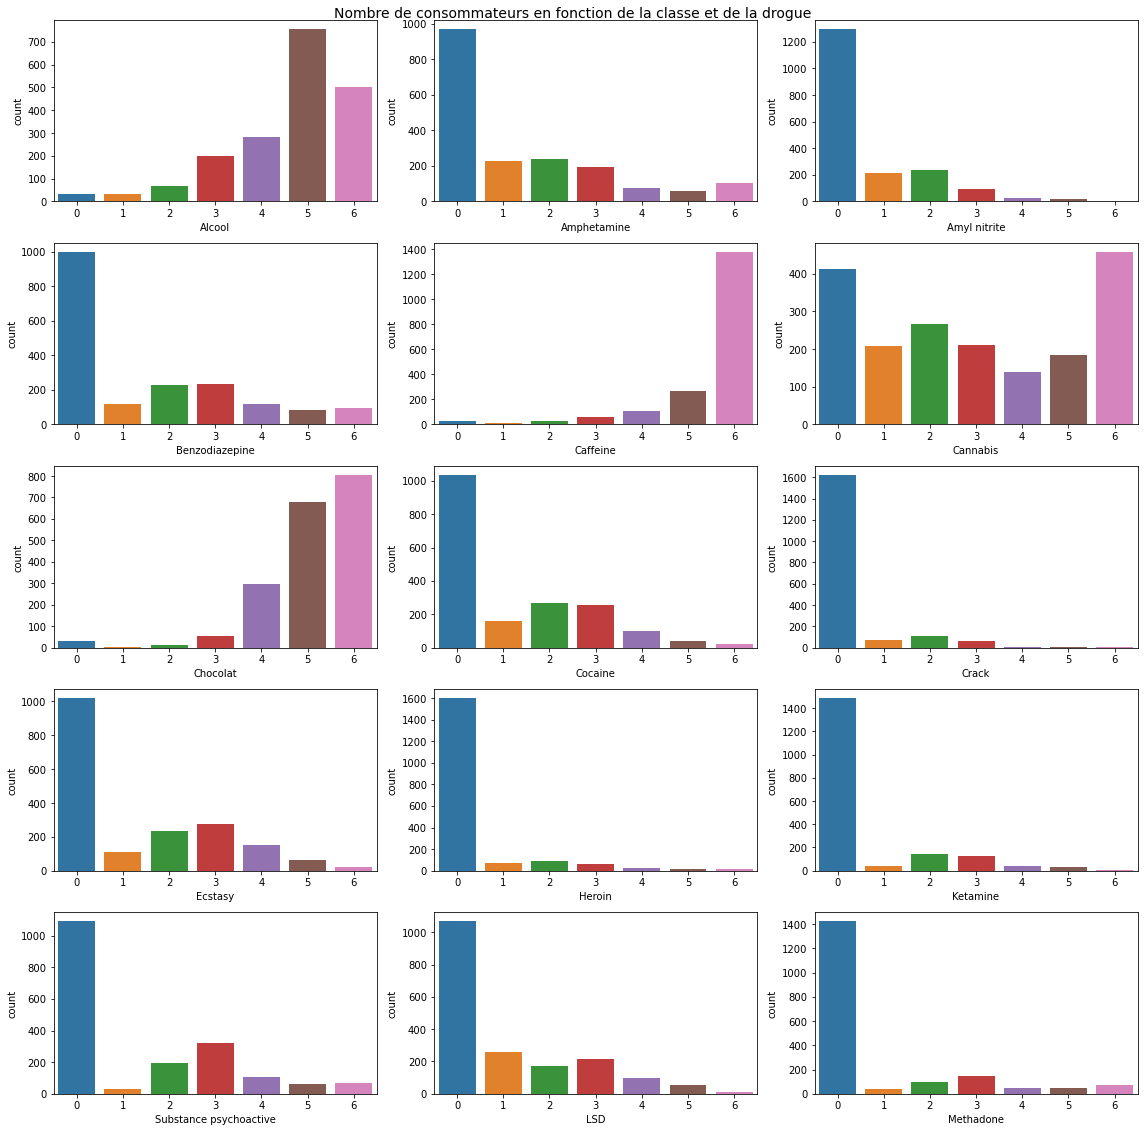

In [28]:
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Nombre de consommateurs en fonction de la classe et de la drogue",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=col_drogue[k], data=data,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

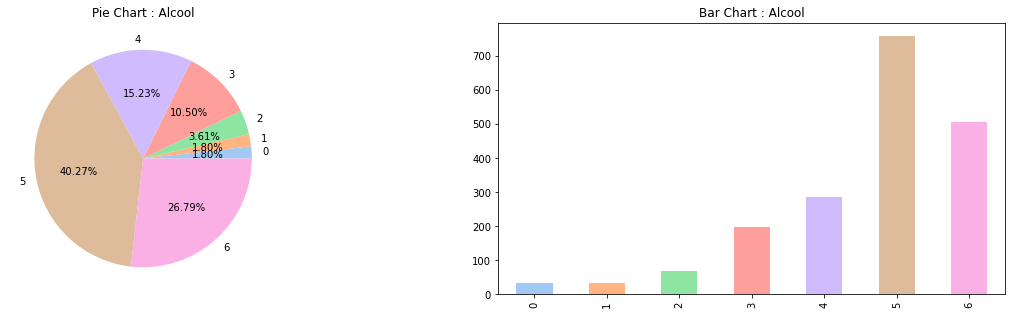

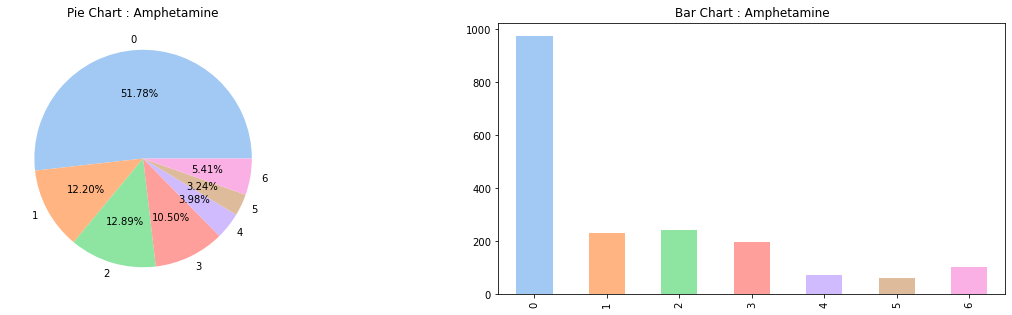

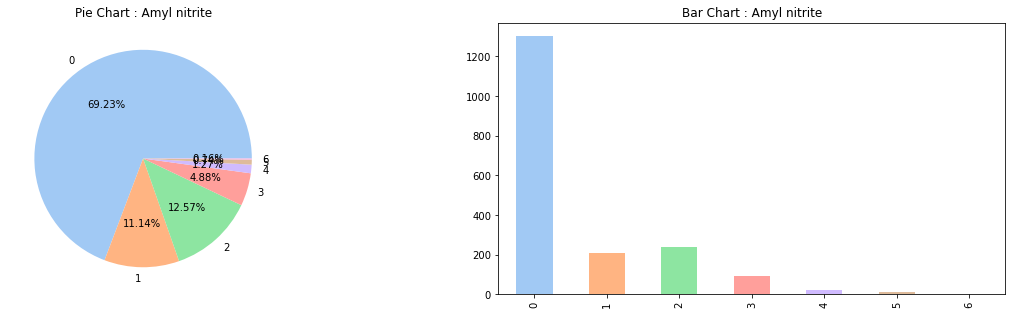

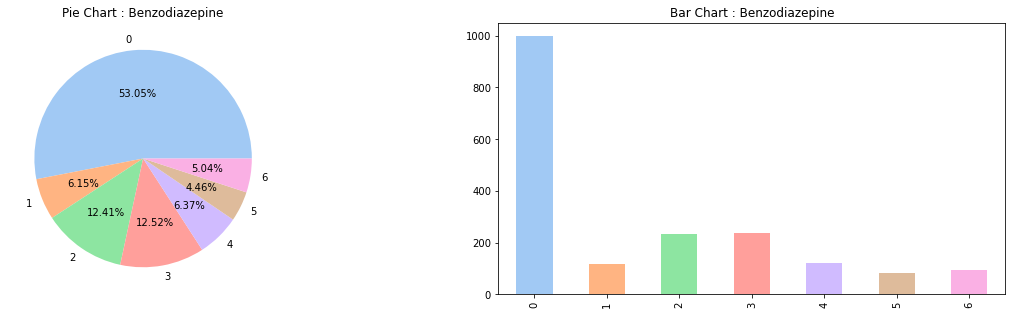

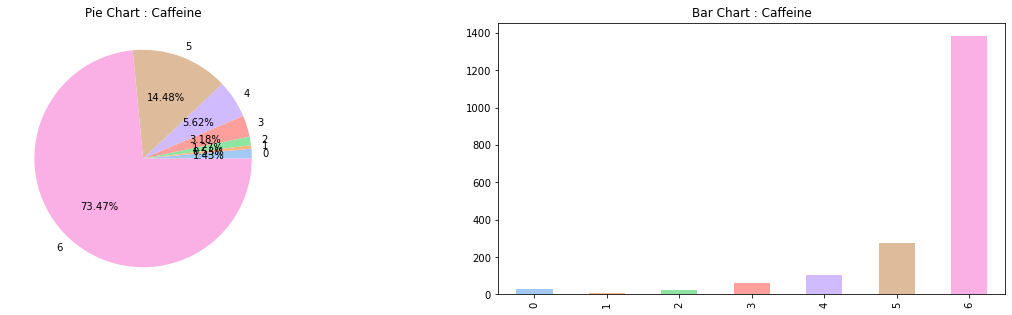

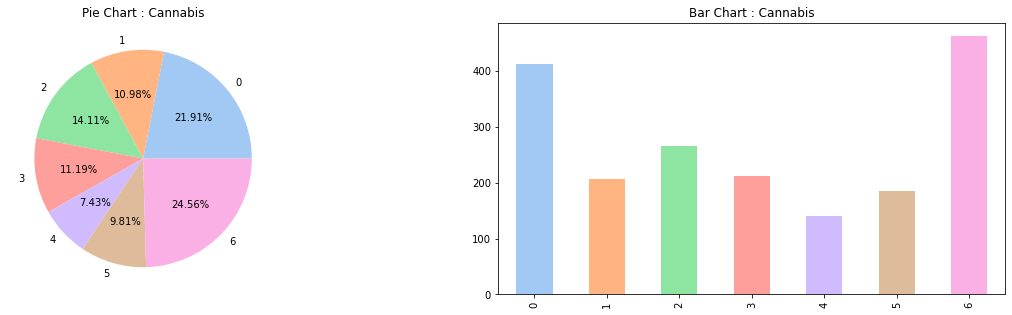

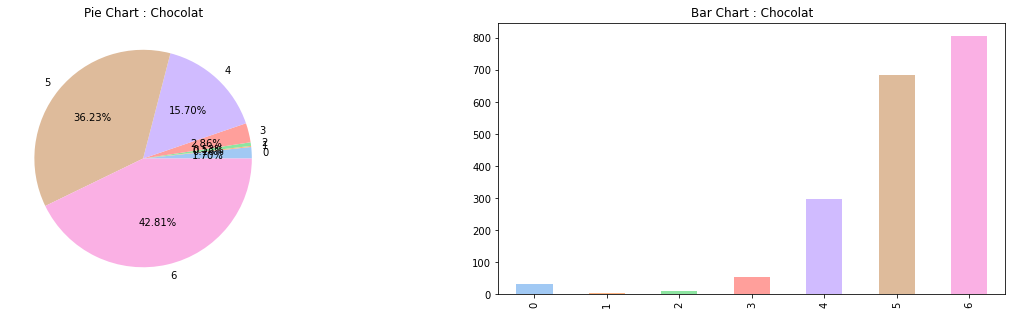

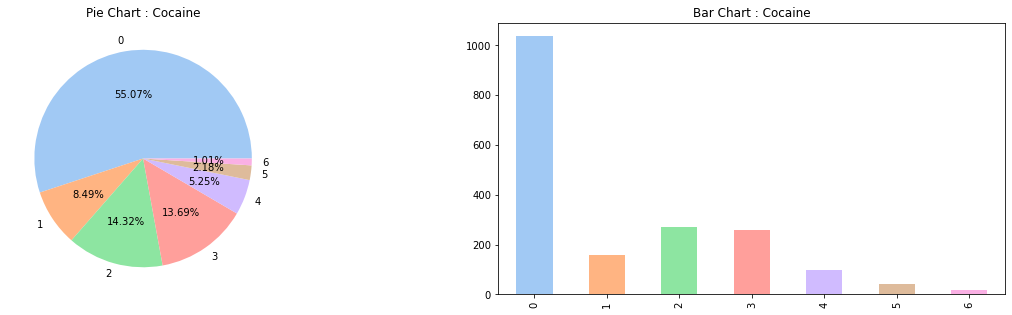

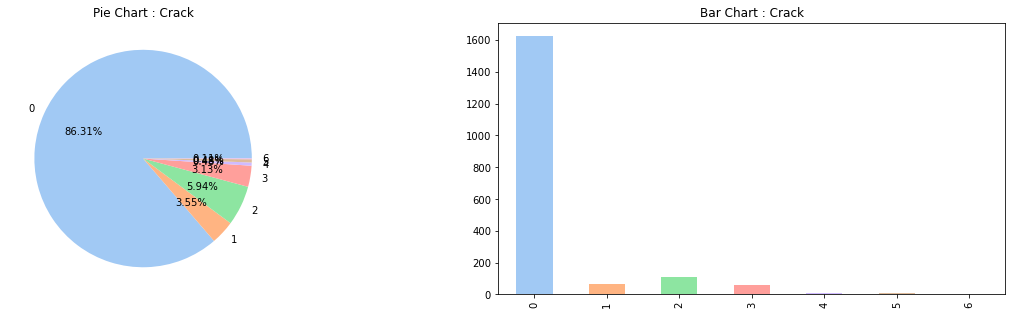

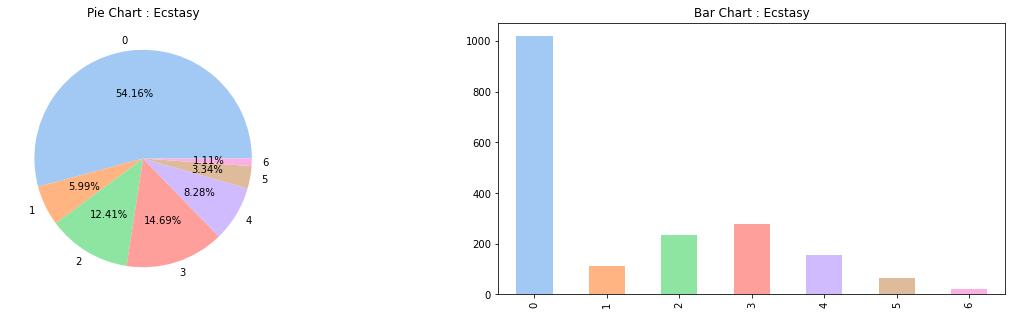

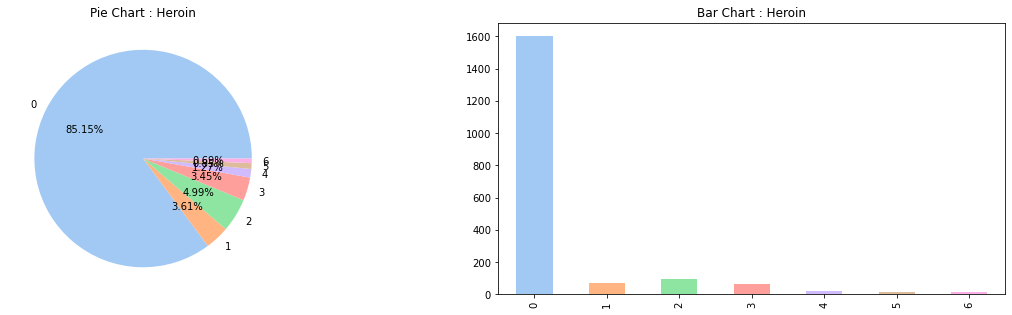

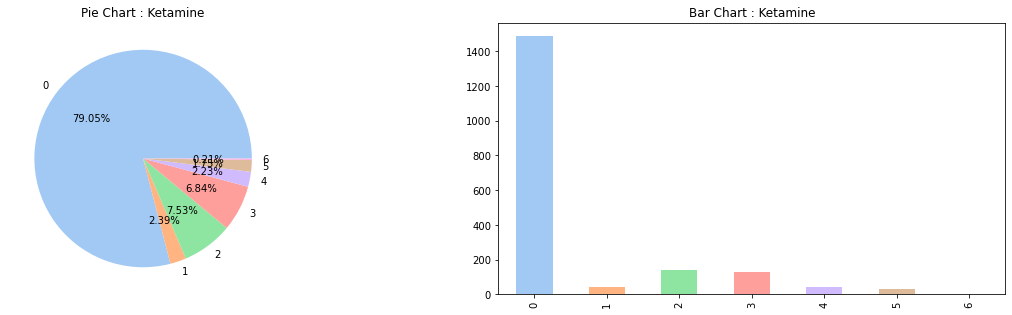

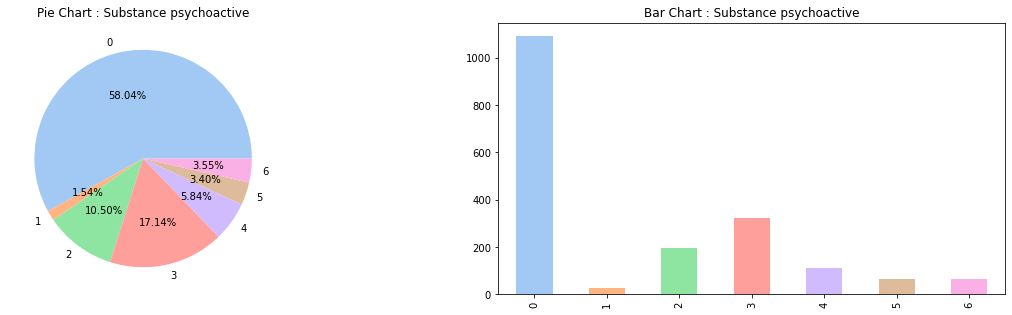

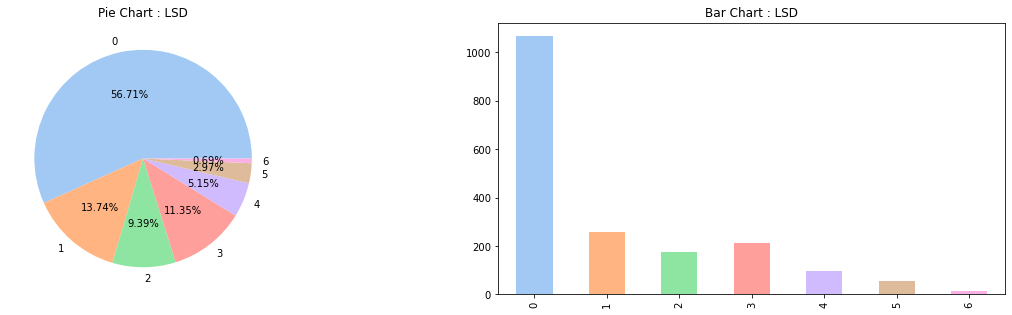

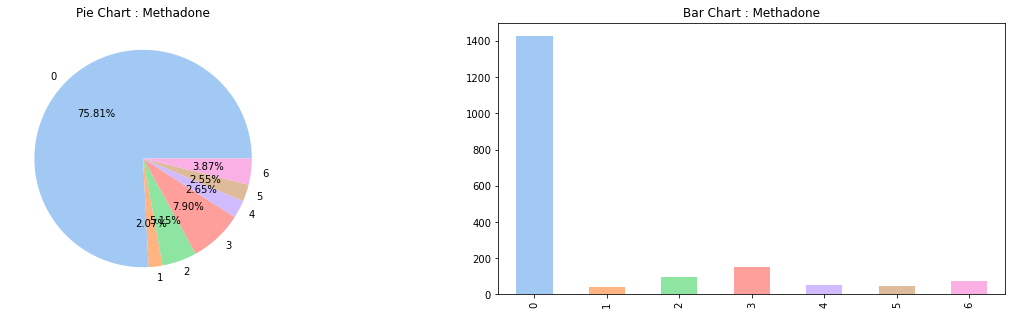

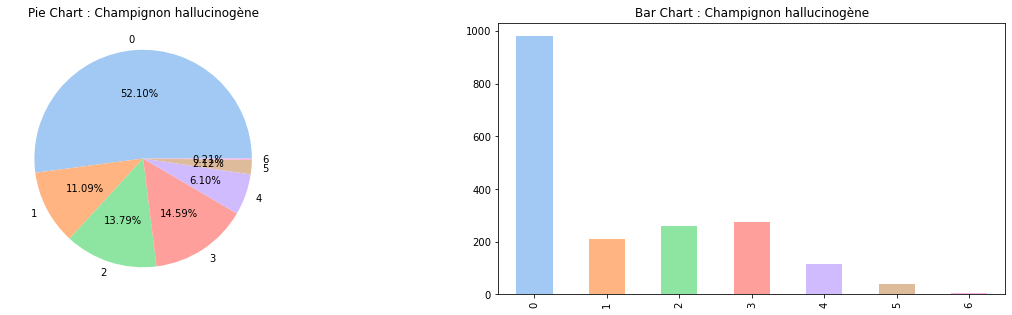

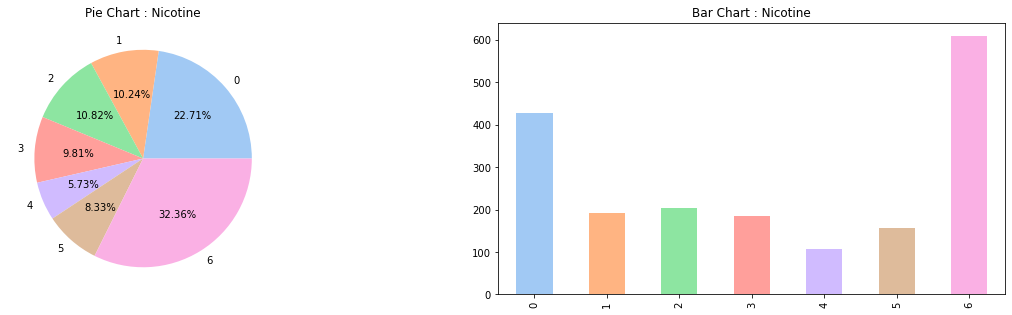

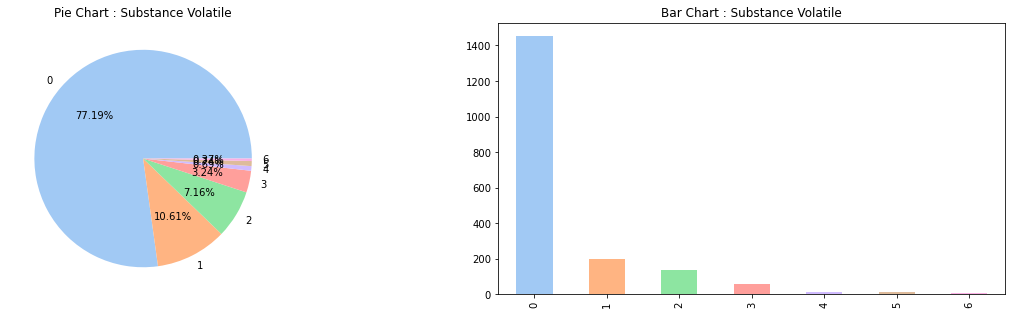

In [29]:
visu(df, 'Alcool')
visu(df, 'Amphetamine')
visu(df, 'Amyl nitrite')
visu(df, 'Benzodiazepine')
visu(df, 'Caffeine')
visu(df, 'Cannabis')
visu(df, 'Chocolat')
visu(df, 'Cocaine')
visu(df, 'Crack')
visu(df, 'Ecstasy')
visu(df, 'Heroin')
visu(df, 'Ketamine')
visu(df, 'Substance psychoactive')
visu(df, 'LSD')
visu(df, 'Methadone')
visu(df, 'Champignon hallucinogène')
visu(df, 'Nicotine')
visu(df, 'Substance Volatile')

In [30]:
count_test = []
count_nontest = []
for i in range(len(col_drogue)):
    s = data_test.groupby([col_drogue[i]])[col_drogue[i]].count()
    count_test.append(s[1])
    count_nontest.append(s[0])

trace1 = go.Bar(
    x=col_drogue,
    y=count_test,
    name='Déjà testé',
    marker = dict(color="mediumslateblue")
)
trace2 = go.Bar(
    x=col_drogue,
    y=count_nontest,
    name='Jamais testé',
    marker = dict(color="lightcoral")
)


datafig = [trace1, trace2]
layout = go.Layout(
    title= 'Nombre de personnes ayant déjà testé ou non chaque drogue',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    barmode='group'
)

fig = go.Figure(data=datafig, layout=layout)
py.iplot(fig, filename='grouped-bar')

Nous avons pu voir que certaines drogues n'ont jamais été consommées par la majorité des participants (plus de 50%), tandis que d'autres, comme l'alcool, la nicotine ou le cannabis, sont beaucoup plus consommées (régulièrement ou non), et d'autres 'drogues' comme la caféine ou le chocolat sont consommées par presque tous les participants très régulièrement.

#### Corrélation entre les drogues
On remarque quelques corrélations modérées entre certaines drogues sur la heatmap ci-dessous.

<AxesSubplot:>

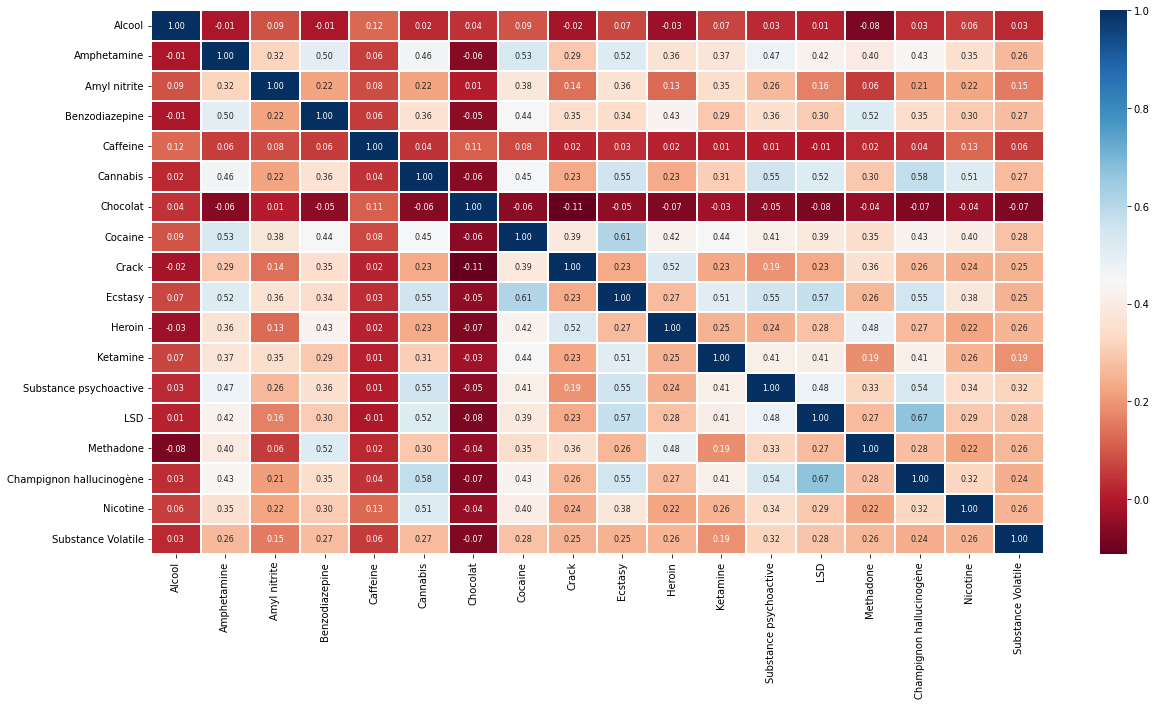

In [31]:
corr = data[col_drogue].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdBu',annot=True, annot_kws={"fontsize":8}, linewidth = 0.1, fmt='.2f')

#### Corrélations entre les drogues et les caractéristiques démographiques et de personnalité

<AxesSubplot:>

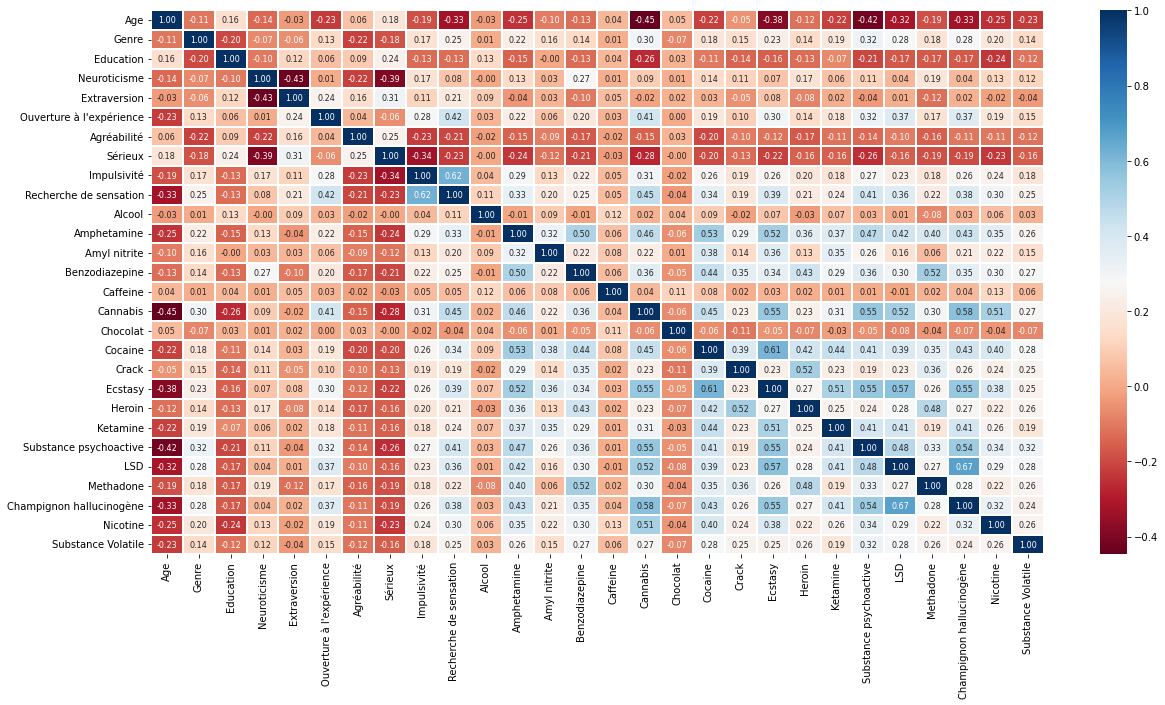

In [32]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdBu',annot=True, annot_kws={"fontsize":8}, linewidth = 0.1, fmt='.2f')

<AxesSubplot:>

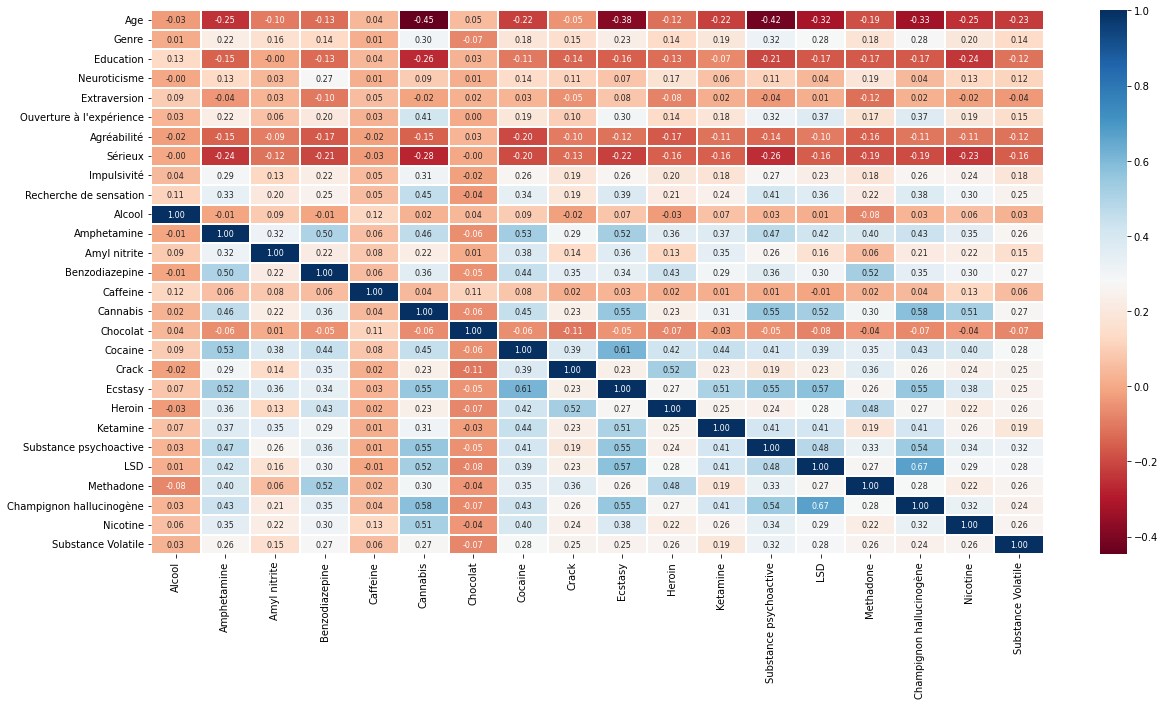

In [33]:
corr = data.corr()[col_drogue]
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdBu',annot=True, annot_kws={"fontsize":8}, linewidth = 0.1, fmt='.2f')

Les valeurs intéressantes sont les corrélations entre la consommation de drogues et les autres caractéristiques (de démographie et de personnalité).

Les caractéristiques démographiques semblent avoir de nombreuses corrélations négatives ou très proches de 0, tandis que certains traits de personnalité semblent avoir des corrélations positives, comme "l'ouverture à l'expérience", "l'impulsivité" ou "la recherche de sensations".

On observe aussi que les corrélations les plus fortes sont entre 2 drogues entre elles : par exemple, la corrélation entre la Cocaïne et l'Ecstasy est de 0,61, et celle entre les champignons hallucinogènes et le LSD est de 0,67. 

<AxesSubplot:>

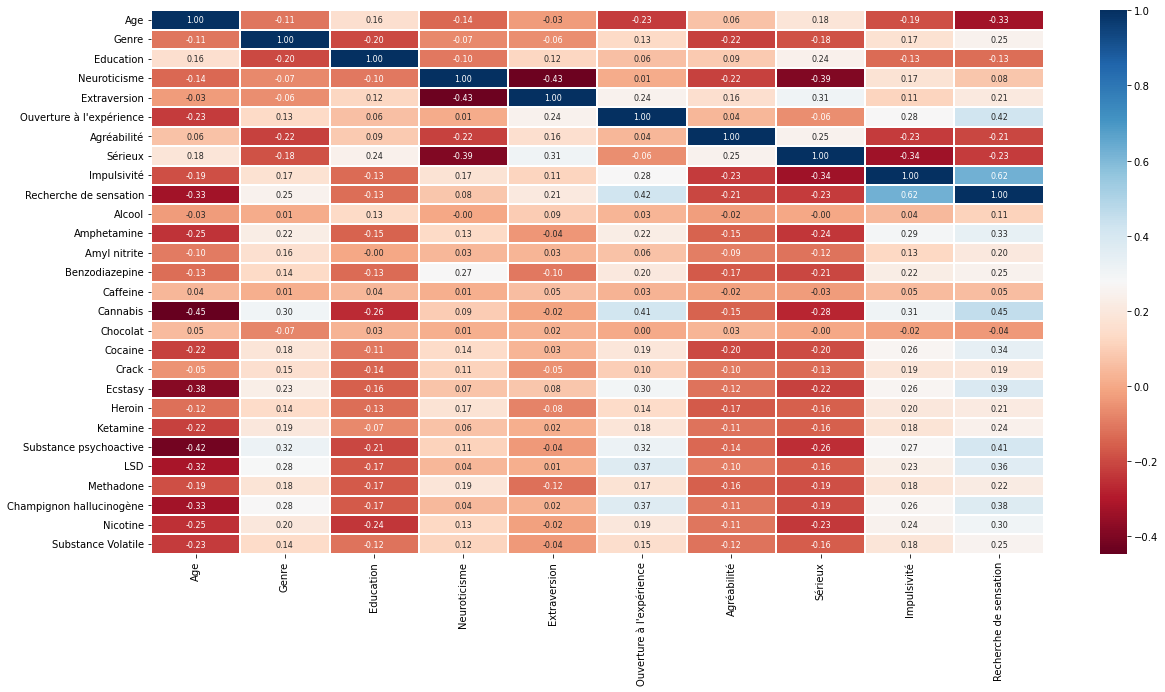

In [34]:
corr = data.corr()[col_démographie+col_personnalité]
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdBu',annot=True, annot_kws={"fontsize":8}, linewidth = 0.1, fmt='.2f')

#### Corrélations importantes liées à la consommation de cannabis

Sur l'ensemble des colonnes du dataset (démographie, personnalité et autres drogues) : 

On remarque que ce sont d'autres drogues qui sont le plus corrélées à la consommation de cannabis.

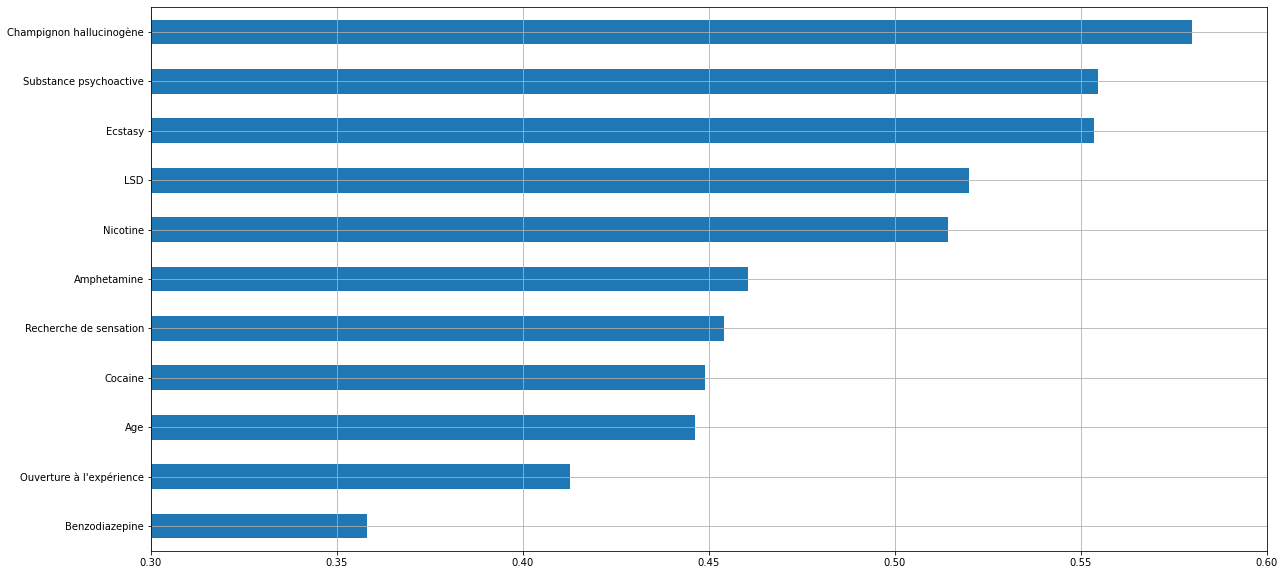

In [35]:
cannabis_corr = data.corr()['Cannabis']
filt = cannabis_corr.apply(lambda x : abs(x) > 0.35 and x != 1)
abs(cannabis_corr[filt]).sort_values().plot.barh(figsize=(20,10), xlim=(0.3,0.6), 
                                                    xticks=np.linspace(0.3,0.8,11),
                                                   grid=True)
plt.show()

Uniquement sur les colonnes caractéristiques (démographie et personnalité, en excluant les autres drogues) : 

On remarque cette fois que la recherche de sensation, l'âge et l'ouverture à l'expérience sont les traits de personnalité les plus correlées à la consommation de cannabis.

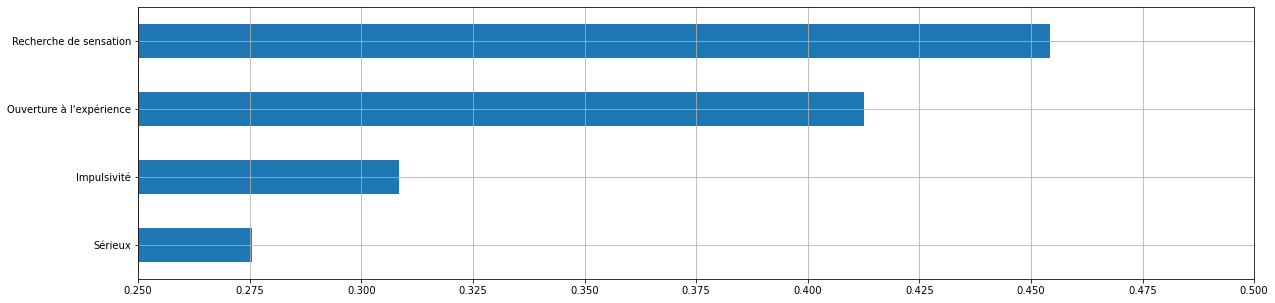

In [36]:
cannabis_corr = data[col_personnalité+ ['Cannabis']].corr()['Cannabis']
filt = cannabis_corr.apply(lambda x : abs(x) > 0.15 and x != 1)
abs(cannabis_corr[filt]).sort_values().plot.barh(figsize=(20,5), xlim=(0.25,0.5), 
                                                    xticks=np.linspace(0.25,0.5,11),
                                                   grid=True)
plt.show()


Pareil mais en rajoutant les drogues légales

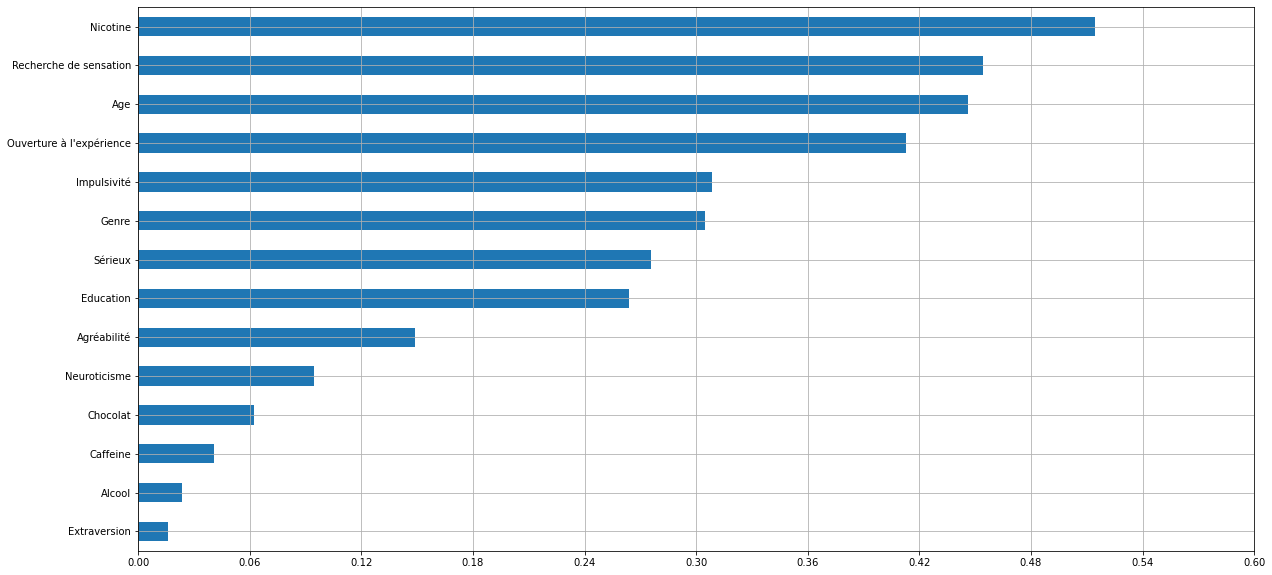

In [37]:
cannabis_corr = data[col_démographie+col_personnalité+col_drogue_légale+ ['Cannabis']].corr()['Cannabis']
filt = cannabis_corr.apply(lambda x : x != 1)
abs(cannabis_corr[filt]).sort_values().plot.barh(figsize=(20,10), xlim=(0,0.6), 
                                                    xticks=np.linspace(0,0.6,11),
                                                   grid=True)
plt.show()


#### Corrélations importantes liées à la consommation d'alcool
Sur l'ensemble des colonnes du dataset (démographie, personnalité et autres drogues) :

On remarque que ce sont les variables Education, Cafféine et recherche de sensation les plus correlées à la consommation d'alcool.

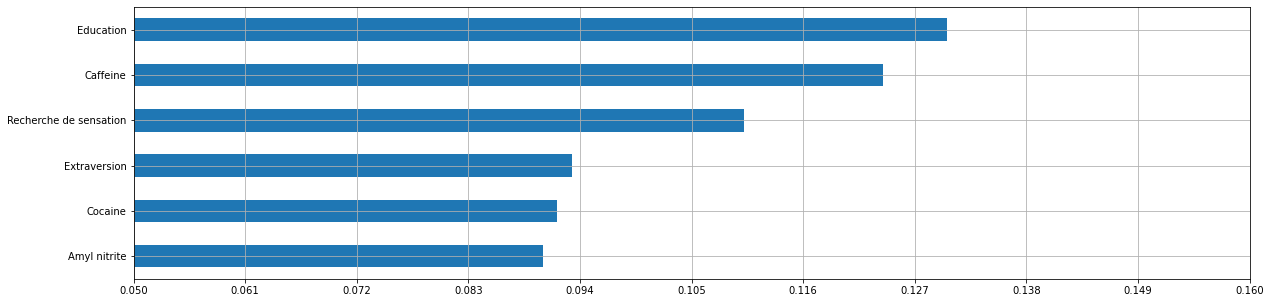

In [38]:
alcool_corr = data.corr()['Alcool']
filt = alcool_corr.apply(lambda x : abs(x) > 0.09 and x != 1)
abs(alcool_corr[filt]).sort_values().plot.barh(figsize=(20,5),  xlim=(0.05,0.16),
                                                    xticks=np.linspace(0.05,0.16,11),
                                                   grid=True)
plt.show()

Uniquement sur les colonnes caractéristiques (démographie et personnalité, en excluant les autres drogues) :

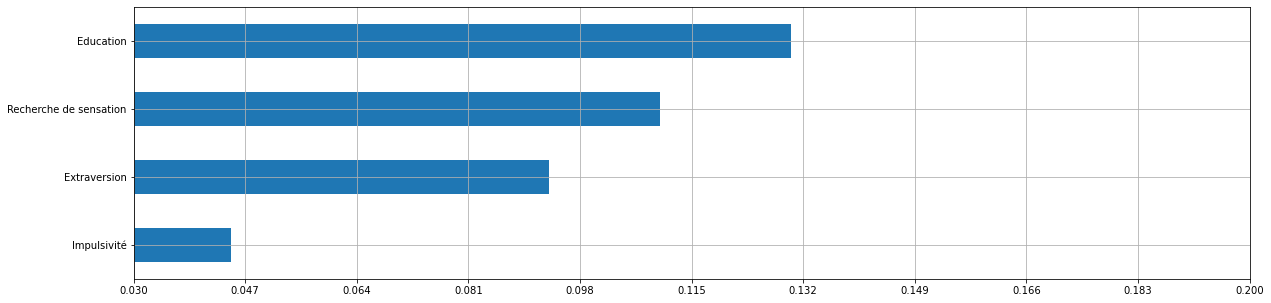

In [39]:
alcool_corr = data[col_démographie+col_personnalité+ ['Alcool']].corr()['Alcool']
filt = alcool_corr.apply(lambda x : abs(x) > 0.035 and x != 1)
abs(alcool_corr[filt]).sort_values().plot.barh(figsize=(20,5), xlim=(0.03,0.2), 
                                                    xticks=np.linspace(0.03,0.2,11),
                                                   grid=True)
plt.show()

#### Corrélations importantes liées à la recherche de sensation

Ici, on cherche à savoir quelles drogues sont les plus liées aux personnes qui recherchent des sensations.

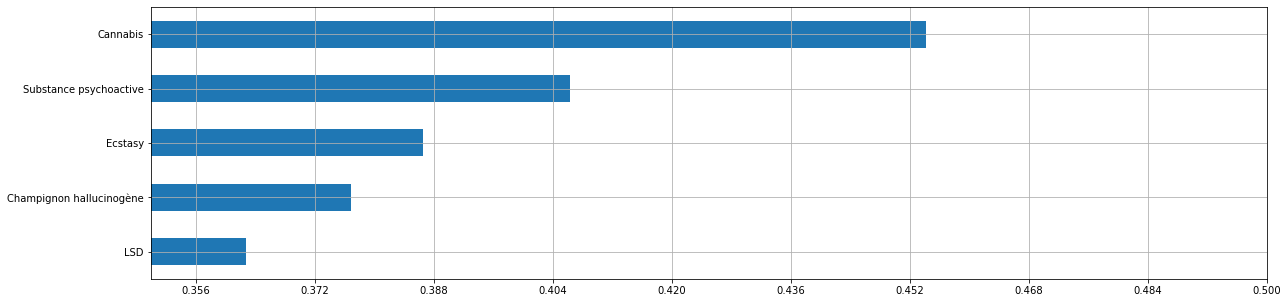

In [40]:
cor = data[col_drogue +['Recherche de sensation']].corr()['Recherche de sensation']
filt = cor.apply(lambda x : abs(x) > 0.35 and x != 1)
abs(cor[filt]).sort_values().plot.barh(figsize=(20,5),  xlim=(0.35,0.5),
                                                    xticks=np.linspace(0.34,0.5,11),
                                                   grid=True)
plt.show()

#### Corrélations importantes liées à l'ouverture à l'expérience

Ici, on cherche à savoir quelles drogues sont les plus liées aux personnes qui sont ouvertes à l'expérience.

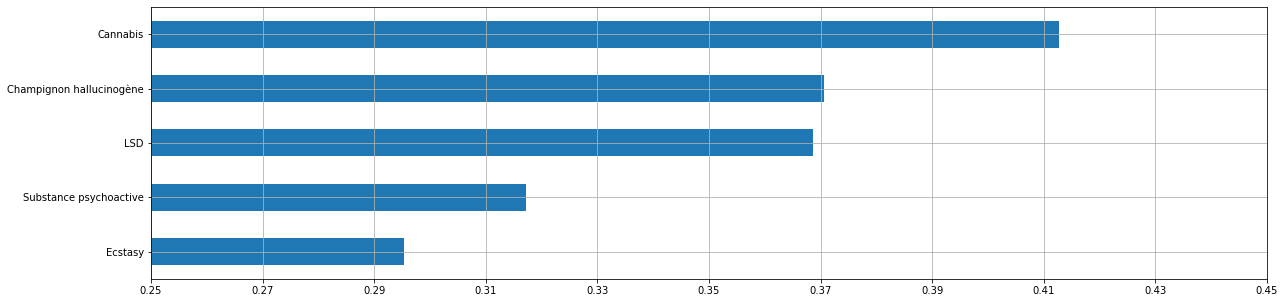

In [41]:
cor = data[col_drogue +['Ouverture à l\'expérience']].corr()['Ouverture à l\'expérience']
filt = cor.apply(lambda x : abs(x) > 0.25 and x != 1)
abs(cor[filt]).sort_values().plot.barh(figsize=(20,5),  xlim=(0.25,0.45),
                                                    xticks=np.linspace(0.25,0.45,11),
                                                   grid=True)
plt.show()

# 3_Data Modeling

# Prédictions

In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score,RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#### Choix des drogues à prédire

On doit choisir des drogues à la fois suffisamment équilibrée et dont la corrélation avec les variables explicatives est suffisamment élevée.

<AxesSubplot:>

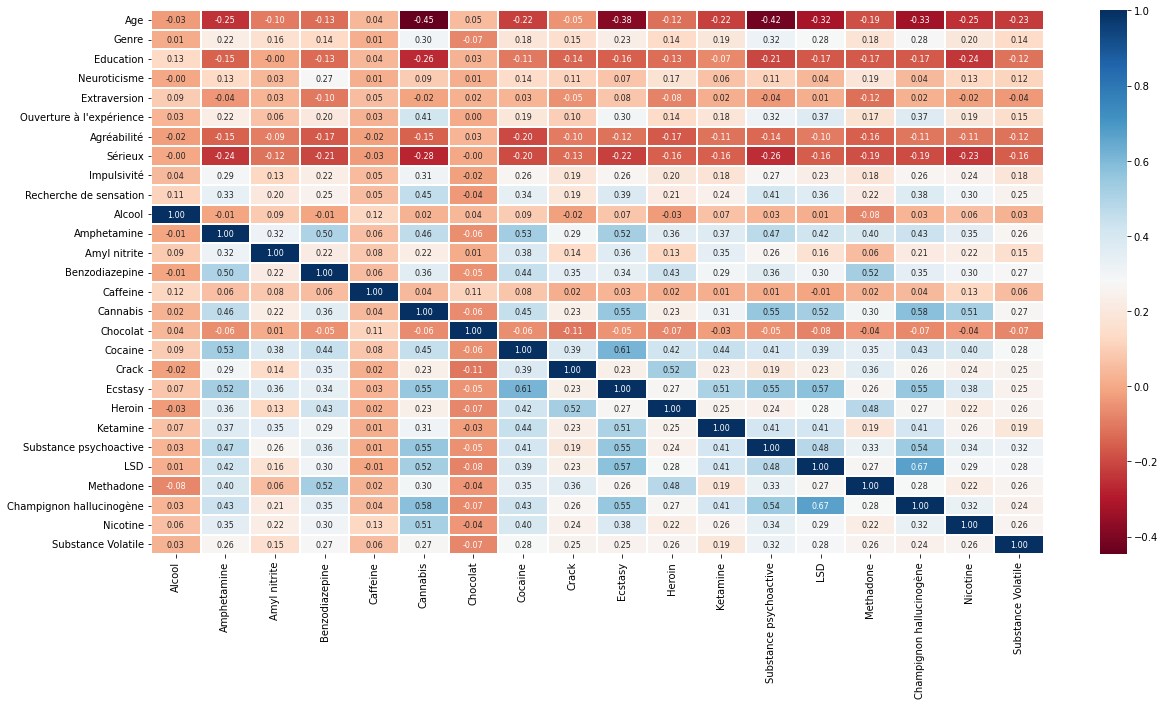

In [43]:
corr = data.corr()[col_drogue]
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='RdBu',annot=True, annot_kws={"fontsize":8}, linewidth = 0.1, fmt='.2f')

Le cannabis, l'ecstasy, les champignons hallucinogène et le lsd ont des bonnes corrélations.

In [44]:
oh_data['Cannabis'].sum()/1885

0.776657824933687

In [45]:
oh_data['Champignon hallucinogène'].sum()/1885

0.47480106100795755

In [46]:
oh_data['Ecstasy'].sum()/1885

0.4546419098143236

In [47]:
oh_data['LSD'].sum()/1885

0.4286472148541114

### Analyse de la consommation d'Ecstasie

#### Création d'une base de donnée améliorée en enlevant les features les moins corrélées à la consommation d'Ecstasie

In [48]:
autres_drogues=col_drogue_illégale.copy()

In [49]:
autres_drogues.remove('Ecstasy')

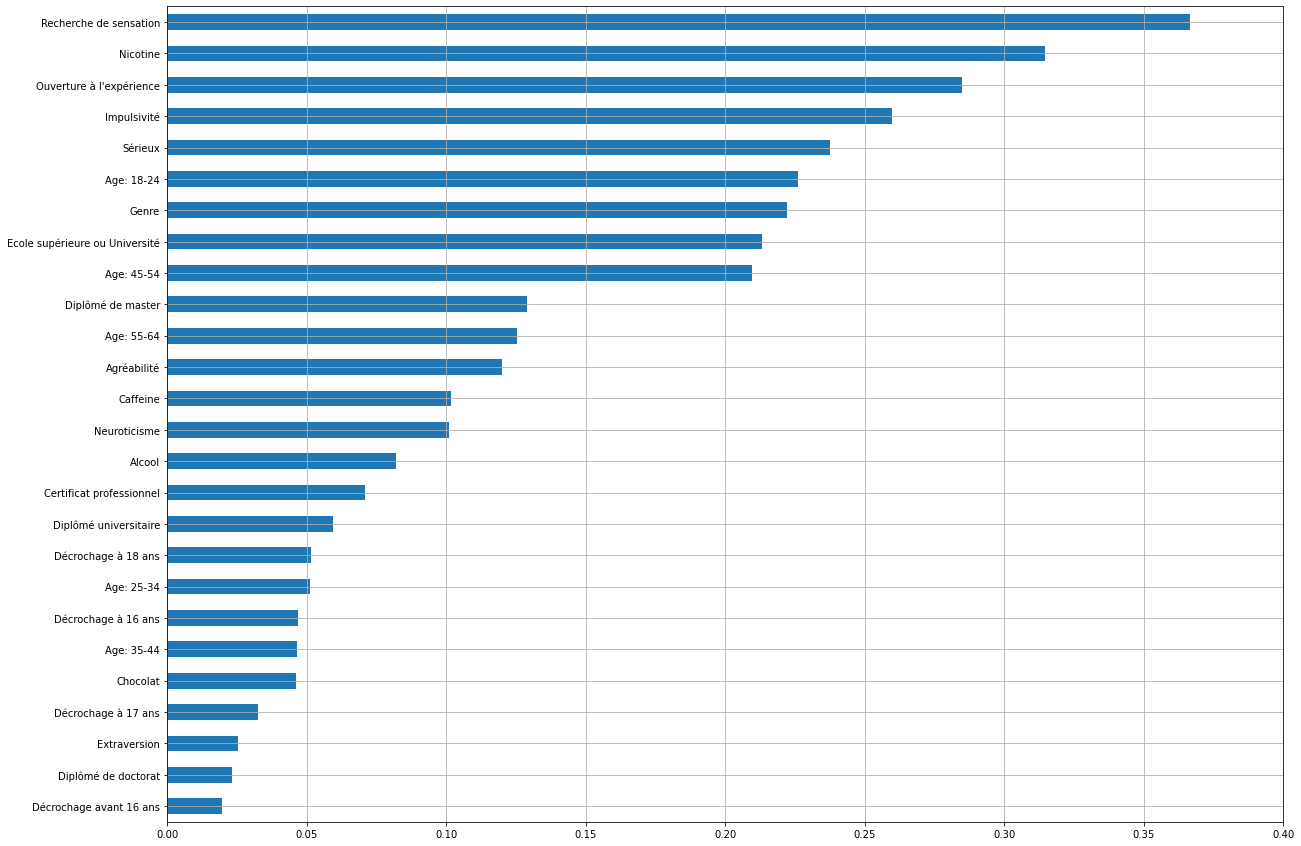

In [50]:
ecstasy_corr = oh_data.drop(autres_drogues,axis=1).corr()['Ecstasy']
filt = ecstasy_corr.apply(lambda x : x != 1)
ecstasy_corr=abs(ecstasy_corr[filt]).sort_values()
ecstasy_corr.plot.barh(figsize=(20,15), xlim=(0,0.4), 
                                                    xticks=np.linspace(0,0.5,11),
                                                   grid=True)
plt.show()


In [51]:
ecstasy_corr[:12]

Décrochage avant 16 ans     0.019550
Diplômé de doctorat         0.023329
Extraversion                0.025434
Décrochage à 17 ans         0.032600
Chocolat                    0.046356
Age: 35-44                  0.046665
Décrochage à 16 ans         0.046854
Age: 25-34                  0.051096
Décrochage à 18 ans         0.051672
Diplômé universitaire       0.059522
Certificat professionnel    0.070942
Alcool                      0.081930
Name: Ecstasy, dtype: float64

In [52]:
improved_data=oh_data.drop(ecstasy_corr[:12].index,axis=1)

In [53]:
improved_data.head()

,Genre,Neuroticisme,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Age: 45-54,Age: 55-64,Ecole supérieure ou Université,Diplômé de master
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,-0.67825,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0,1,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0
3,1,-0.46725,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,-0.14882,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
5,0,0.73545,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


#### Data preprocessing

In [54]:
def preprocessing_inputs(data, drogue):
    data = data.copy()
    #Séparation en X et y 
    if drogue in col_drogue_illégale:
        X = data.drop(col_drogue_illégale, axis=1)
        y = data[drogue]
    else:
        X = data.drop(col_drogue_illégale, axis=1)
        X.drop(drogue,axis=1, inplace=True)
        y = data[drogue]
    #Séparation en training et testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    # Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    return X_train, X_test, y_train, y_test

Fonction qui renvoie la précision, le recall, le f1-score et la matrice de confusion :

In [55]:
def report_performance(model):
    model_pred = model.predict(X_test)
    cm=confusion_matrix(y_test, model_pred)
    cm = cm / cm.astype(np.float).sum(axis=1)[:, np.newaxis] 
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='.0%',cmap='Reds').set(title='Matrice de confusion');
    ax.set_xlabel('Valeur prédite')
    ax.set_ylabel('Valeur réelle')
    print(metrics.classification_report(y_test, model_pred))

In [56]:
X_train, X_test, y_train, y_test=preprocessing_inputs(improved_data, 'Ecstasy')

#### Regression Logistique

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       302
           1       0.69      0.70      0.69       262

    accuracy                           0.71       564
   macro avg       0.71      0.71      0.71       564
weighted avg       0.71      0.71      0.71       564



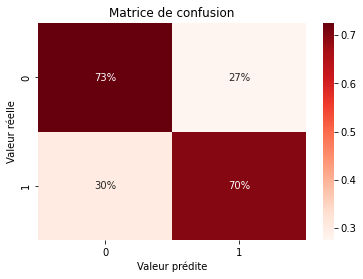

In [57]:
LR=LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial')
LR.fit(X_train, y_train)
LR_pred=LR.predict(X_test)
report_performance(LR)

LR_pred_proba=LR.predict_proba(X_test)[:,1]
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, LR_pred)
roc_auc_LR = auc(fpr_LR, tpr_LR)

#### Cross_val_score

In [58]:
metrics_list = ['f1','accuracy','precision','recall','roc_auc']
scores = pd.DataFrame(index=metrics_list, columns=['score'])

#implementation de cross_val_score pour chaque métrique 
for metric in metrics_list:
    score= cross_val_score(LR, X_train, y_train, scoring=metric).mean()
    scores.loc[metric] = [score]
scores

,score
f1,0.705846
accuracy,0.730328
precision,0.699954
recall,0.712605
roc_auc,0.80702


##### Grid search


Best params:
 {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Train f1 score: 0.700
Test f1 score: 0.692
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       302
           1       0.69      0.70      0.69       262

    accuracy                           0.71       564
   macro avg       0.71      0.71      0.71       564
weighted avg       0.71      0.71      0.71       564



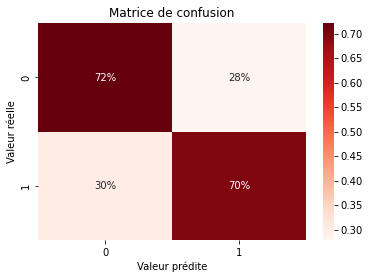

In [59]:
#sources : 
#https://medium.com/@data.science.enthusiast/logistic-regression-tune-hyperparameters-python-code-fintech-does-it-bring-any-value-619e172565e6
#https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

#lbfgs is an overall best performer compared to other methods and is memory efficient. You may encounter convergence issues though.
#saga is also suitable for very large datasets, you can choose this solver for sparse multinomial logistic regression.

# modèle et hyper paramètres
model = LogisticRegression()
solvers = ['lbfgs', 'saga']
penalty = ['none', 'l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
LR_gs = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
LR_grid_result = LR_gs.fit(X_train, y_train)
# Résultats
LR_grid_score=LR_grid_result.score(X_test, y_test)
print('\nBest params:\n', LR_grid_result.best_params_)
print('Train f1 score: %.3f' % LR_grid_result.best_score_)
print('Test f1 score: %.3f' % LR_grid_score)
report_performance(LR_gs)

#### Decision Tree

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       302
           1       0.65      0.80      0.72       262

    accuracy                           0.71       564
   macro avg       0.72      0.72      0.71       564
weighted avg       0.72      0.71      0.71       564



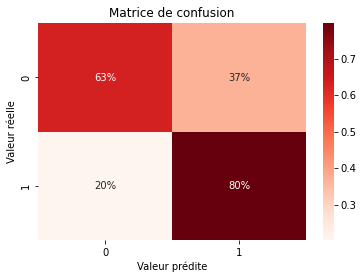

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
DT.fit(X_train, y_train.ravel())
report_performance(DT) 

##### Grid Search


Best params:
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50}
Train f1 score: 0.681
Test f1 score: 0.691
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       302
           1       0.66      0.73      0.69       262

    accuracy                           0.70       564
   macro avg       0.70      0.70      0.70       564
weighted avg       0.70      0.70      0.70       564



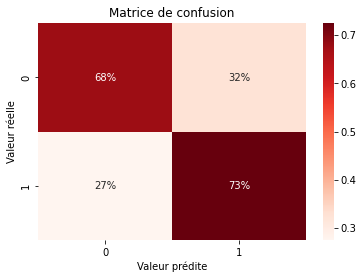

In [61]:
# modèle et hyper paramètres
model=DecisionTreeClassifier()
grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}
# Grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
DT_gs = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
DT_grid_result = DT_gs.fit(X_train, y_train)
# Résultats
DT_grid_score= DT_grid_result.score(X_test, y_test)
print('\nBest params:\n', DT_grid_result.best_params_)
print('Train f1 score: %.3f' % DT_grid_result.best_score_)
print('Test f1 score: %.3f' % DT_grid_score)
report_performance(DT_gs)

#### KNN

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       302
           1       0.64      0.70      0.67       262

    accuracy                           0.68       564
   macro avg       0.68      0.68      0.68       564
weighted avg       0.68      0.68      0.68       564



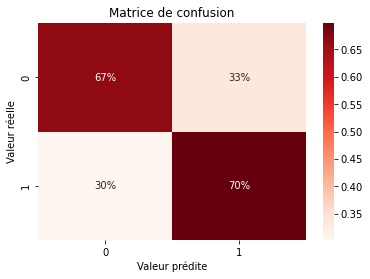

In [62]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
report_performance(KNN)

##### Grid Search


Best params:
 {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Train f1 score: 0.708
Test f1 score: 0.692
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       302
           1       0.66      0.73      0.69       262

    accuracy                           0.70       564
   macro avg       0.70      0.70      0.70       564
weighted avg       0.70      0.70      0.70       564



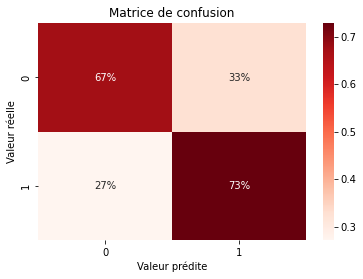

In [63]:
# modèle et hyper paramètres
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# Grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
KNN_gs = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
KNN_grid_result = KNN_gs.fit(X_train, y_train)
# Résultats
KNN_grid_score=KNN_grid_result.score(X_test, y_test)
print('\nBest params:\n', KNN_grid_result.best_params_)
print('Train f1 score: %.3f' % KNN_grid_result.best_score_)
print('Test f1 score: %.3f' % KNN_grid_score)
report_performance(KNN_gs)

#### Support Vector Machine

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       302
           1       0.66      0.71      0.69       262

    accuracy                           0.70       564
   macro avg       0.70      0.70      0.70       564
weighted avg       0.70      0.70      0.70       564



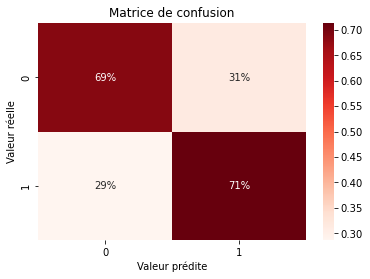

In [64]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(X_train,y_train)
report_performance(SVM)

##### Grid Search


Best params:
 {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Train f1 score: 0.711
Test f1 score: 0.698
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       302
           1       0.69      0.71      0.70       262

    accuracy                           0.71       564
   macro avg       0.71      0.71      0.71       564
weighted avg       0.72      0.71      0.71       564



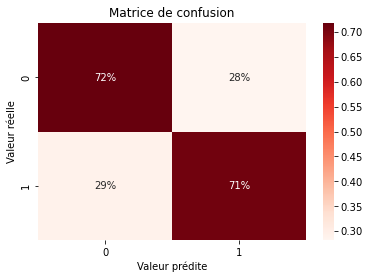

In [65]:
model = SVC(probability=True)
kernel = ['poly', 'rbf', 'sigmoid','linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
SVM_gs = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
SVM_grid_result = SVM_gs.fit(X_train, y_train)
# Résultats
SVM_grid_score=SVM_grid_result.score(X_test, y_test)
print('\nBest params:\n', SVM_grid_result.best_params_)
print('Train f1 score: %.3f' % SVM_grid_result.best_score_)
print('Test f1 score: %.3f' % SVM_grid_score)
report_performance(SVM_gs)

#### Random Forest

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       302
           1       0.68      0.70      0.69       262

    accuracy                           0.71       564
   macro avg       0.71      0.71      0.71       564
weighted avg       0.71      0.71      0.71       564



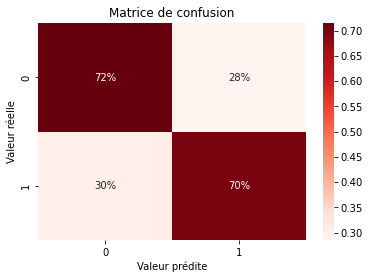

In [66]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 21)
RF.fit(X_train,y_train)
report_performance(RF)

#### Grid search


Best params:
 {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Train f1 score: 0.696
Test f1 score: 0.704
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       302
           1       0.68      0.73      0.70       262

    accuracy                           0.72       564
   macro avg       0.72      0.72      0.72       564
weighted avg       0.72      0.72      0.72       564



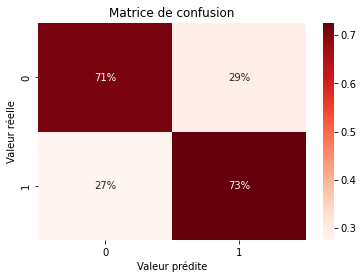

In [67]:
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_gs = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
RF_grid_result = RF_gs.fit(X_train, y_train)
# Résultats
RF_grid_score=RF_grid_result.score(X_test, y_test)
print('\nBest params:\n', RF_grid_result.best_params_)
print('Train f1 score: %.3f' % RF_grid_result.best_score_)
print('Test f1 score: %.3f' % RF_grid_score)
report_performance(RF_gs)

#### Comparaison courbes ROC et f1-score

In [68]:
LR_pred_proba=LR_gs.predict_proba(X_test)[:,1]
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, LR_pred)
roc_auc_LR = auc(fpr_LR, tpr_LR)

In [69]:
DT_pred_proba=DT_gs.predict_proba(X_test)[:,1]
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, DT_pred_proba)
roc_auc_DT = auc(fpr_DT, tpr_DT)

In [70]:
KNN_pred_proba=KNN_gs.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, KNN_pred_proba)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

In [71]:
SVM_pred_proba=SVM_gs.predict_proba(X_test)[:,1]
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, SVM_pred_proba)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

In [72]:
RF_pred_proba=RF_gs.predict_proba(X_test)[:,1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_pred_proba)
roc_auc_RF = auc(fpr_RF, tpr_RF)

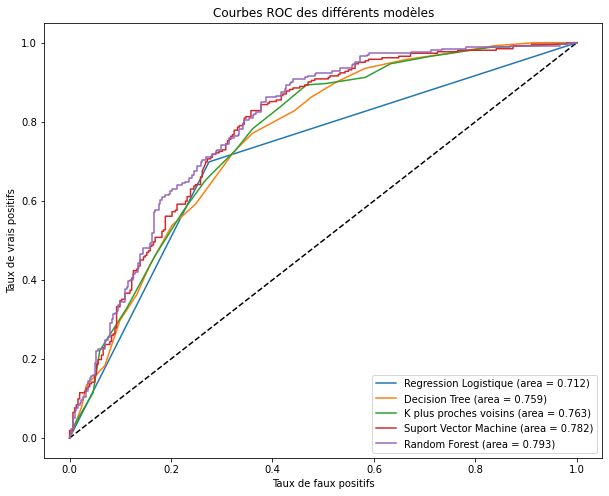

In [73]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LR, tpr_LR, label='Regression Logistique (area = %0.3f)' % roc_auc_LR)
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (area = %0.3f)' % roc_auc_DT)
plt.plot(fpr_KNN, tpr_KNN, label='K plus proches voisins (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_SVM, tpr_SVM, label='Suport Vector Machine (area = %0.3f)' % roc_auc_SVM)
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.3f)' % roc_auc_RF)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC des différents modèles')
plt.legend(loc='best')
plt.show()

On obtient des scores AUC moins bons que pour le cannabis, mais les donnée sont mieux réparties donc le shéma et plus représentatif.

In [74]:
metriques=['Regression Logistique','Decision Tree','K plus proches voisins','Suport Vector Machine','Random Forest']
f1_scores=[LR_grid_score,DT_grid_score,KNN_grid_score,SVM_grid_score,RF_grid_score]
meilleurs_scores=pd.DataFrame(index=metriques, data=f1_scores, columns=['f1-score'])
meilleurs_scores.sort_values(by='f1-score', ascending=False)

,f1-score
Random Forest,0.703704
Suport Vector Machine,0.697936
K plus proches voisins,0.692029
Regression Logistique,0.691871
Decision Tree,0.690909


### Analyse de la consommation de champignons hallucinogènes

#### Création d'une base de donnée améliorée en enlevant les features les moins corrélées à la consommation de champignons hallucinogènes

In [75]:
autres_drogues=col_drogue_illégale.copy()

In [76]:
autres_drogues.remove('Champignon hallucinogène')

In [77]:
oh_data.head()

,Genre,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Age: 25-34,Age: 35-44,Age: 45-54,Age: 55-64,Décrochage avant 16 ans,Décrochage à 16 ans,Décrochage à 17 ans,Décrochage à 18 ans,Ecole supérieure ou Université,Certificat professionnel,Diplômé universitaire,Diplômé de master,Diplômé de doctorat
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


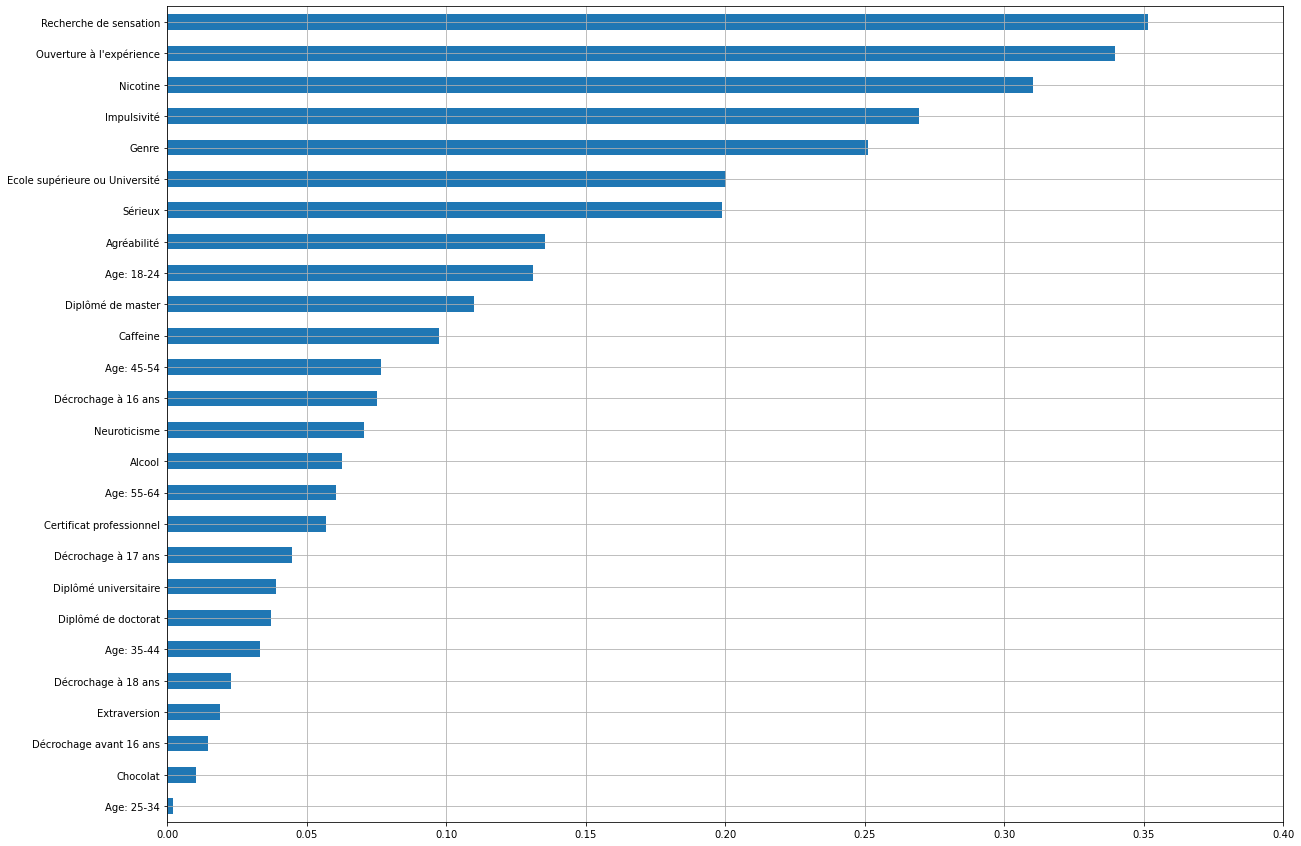

In [78]:
champignon_corr = oh_data.drop(autres_drogues,axis=1).corr()['Champignon hallucinogène']
filt = champignon_corr.apply(lambda x : x != 1)
champignon_corr=abs(champignon_corr[filt]).sort_values()
champignon_corr.plot.barh(figsize=(20,15), xlim=(0,0.4), 
                                                    xticks=np.linspace(0,0.5,11),
                                                   grid=True)
plt.show()


In [79]:
champignon_corr[:12]

Age: 25-34                  0.002141
Chocolat                    0.010369
Décrochage avant 16 ans     0.014509
Extraversion                0.018805
Décrochage à 18 ans         0.022879
Age: 35-44                  0.033429
Diplômé de doctorat         0.037328
Diplômé universitaire       0.038983
Décrochage à 17 ans         0.044731
Certificat professionnel    0.056969
Age: 55-64                  0.060679
Alcool                      0.062782
Name: Champignon hallucinogène, dtype: float64

In [80]:
improved_data=oh_data.drop(champignon_corr[:12].index,axis=1)

In [81]:
improved_data.head()

,Genre,Neuroticisme,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Age: 45-54,Décrochage à 16 ans,Ecole supérieure ou Université,Diplômé de master
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,-0.67825,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0,1,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0
3,1,-0.46725,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,-0.14882,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
5,0,0.73545,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [82]:
X_train, X_test, y_train, y_test=preprocessing_inputs(improved_data, 'Champignon hallucinogène')

#### Random Forest

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       294
           1       0.68      0.71      0.70       270

    accuracy                           0.70       564
   macro avg       0.70      0.70      0.70       564
weighted avg       0.70      0.70      0.70       564



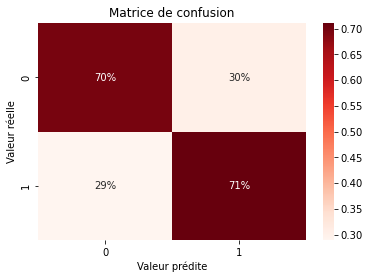

In [83]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 21)
RF.fit(X_train,y_train)
report_performance(RF)

#### Grid search


Best params:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train f1 score: 0.722
Test f1 score: 0.718
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       294
           1       0.68      0.76      0.72       270

    accuracy                           0.71       564
   macro avg       0.72      0.72      0.71       564
weighted avg       0.72      0.71      0.71       564



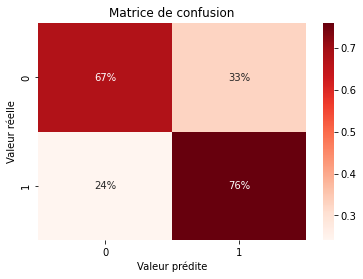

In [84]:
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_gs = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
RF_grid_result = RF_gs.fit(X_train, y_train)
# Résultats
RF_grid_score=RF_grid_result.score(X_test, y_test)
print('\nBest params:\n', RF_grid_result.best_params_)
print('Train f1 score: %.3f' % RF_grid_result.best_score_)
print('Test f1 score: %.3f' % RF_grid_score)
report_performance(RF_gs)

In [85]:
RF_pred_proba=RF_gs.predict_proba(X_test)[:,1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_pred_proba)
roc_auc_RF = auc(fpr_RF, tpr_RF)

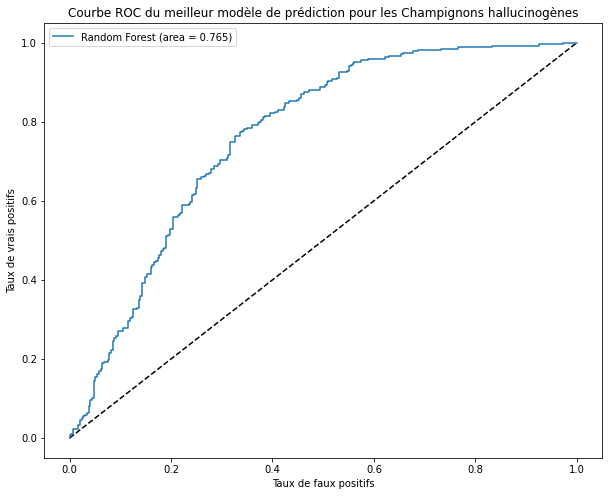

In [86]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.3f)' % roc_auc_RF)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC du meilleur modèle de prédiction pour les Champignons hallucinogènes')
plt.legend(loc='best')
plt.show()

### Analyse de la consommation de LSD

#### Création d'une base de donnée améliorée en enlevant les features les moins corrélées à la consommation de LSD

In [87]:
autres_drogues=col_drogue_illégale.copy()

In [88]:
autres_drogues.remove('LSD')

In [89]:
oh_data.head()

,Genre,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Age: 25-34,Age: 35-44,Age: 45-54,Age: 55-64,Décrochage avant 16 ans,Décrochage à 16 ans,Décrochage à 17 ans,Décrochage à 18 ans,Ecole supérieure ou Université,Certificat professionnel,Diplômé universitaire,Diplômé de master,Diplômé de doctorat
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


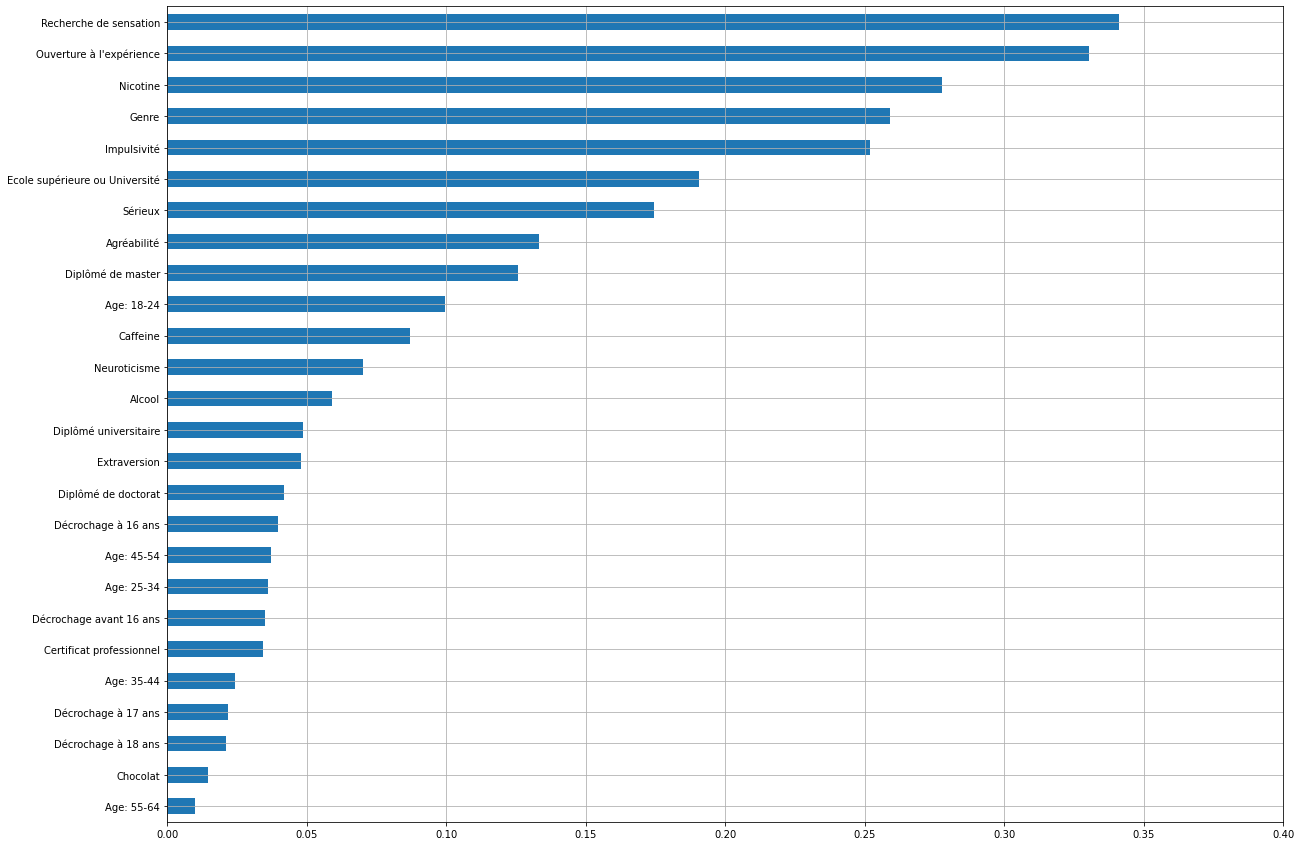

In [90]:
lsd_corr = oh_data.drop(autres_drogues,axis=1).corr()['LSD']
filt = lsd_corr.apply(lambda x : x != 1)
lsd_corr=abs(lsd_corr[filt]).sort_values()
lsd_corr.plot.barh(figsize=(20,15), xlim=(0,0.4), 
                                                    xticks=np.linspace(0,0.5,11),
                                                   grid=True)
plt.show()


In [91]:
lsd_corr[:12]

Age: 55-64                  0.010086
Chocolat                    0.014755
Décrochage à 18 ans         0.021099
Décrochage à 17 ans         0.021952
Age: 35-44                  0.024229
Certificat professionnel    0.034426
Décrochage avant 16 ans     0.035032
Age: 25-34                  0.036076
Age: 45-54                  0.037181
Décrochage à 16 ans         0.039597
Diplômé de doctorat         0.042083
Extraversion                0.048169
Name: LSD, dtype: float64

In [92]:
improved_data=oh_data.drop(lsd_corr[:12].index,axis=1)

In [93]:
improved_data.head()

,Genre,Neuroticisme,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Ecole supérieure ou Université,Diplômé universitaire,Diplômé de master
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,-0.67825,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0
3,1,-0.46725,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,-0.14882,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1
5,0,0.73545,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0


In [94]:
X_train, X_test, y_train, y_test=preprocessing_inputs(improved_data, 'LSD')

#### Random Forest

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       310
           1       0.69      0.63      0.66       254

    accuracy                           0.71       564
   macro avg       0.70      0.70      0.70       564
weighted avg       0.70      0.71      0.70       564



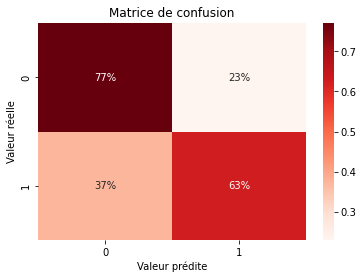

In [95]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 21)
RF.fit(X_train,y_train)
report_performance(RF)

#### Grid search


Best params:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}
Train f1 score: 0.640
Test f1 score: 0.657
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       310
           1       0.68      0.64      0.66       254

    accuracy                           0.70       564
   macro avg       0.70      0.69      0.70       564
weighted avg       0.70      0.70      0.70       564



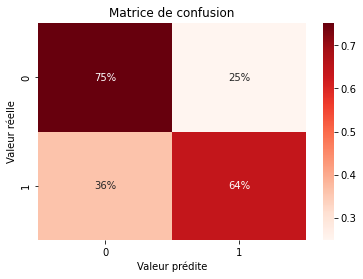

In [96]:
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_gs = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
RF_grid_result = RF_gs.fit(X_train, y_train)
# Résultats
RF_grid_score=RF_grid_result.score(X_test, y_test)
print('\nBest params:\n', RF_grid_result.best_params_)
print('Train f1 score: %.3f' % RF_grid_result.best_score_)
print('Test f1 score: %.3f' % RF_grid_score)
report_performance(RF_gs)

In [97]:
RF_pred_proba=RF_gs.predict_proba(X_test)[:,1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_pred_proba)
roc_auc_RF = auc(fpr_RF, tpr_RF)

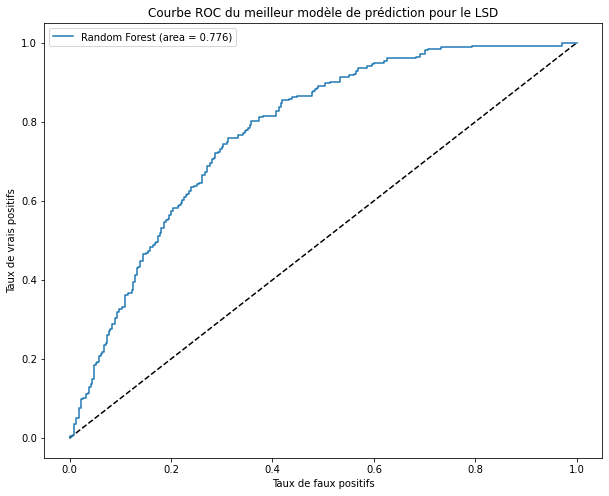

In [98]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.3f)' % roc_auc_RF)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC du meilleur modèle de prédiction pour le LSD')
plt.legend(loc='best')
plt.show()

### Analyse de la consommation de Cannabis

#### Création d'une base de donnée améliorée en enlevant les features les moins corrélées à la consommation de cannabis

In [99]:
autres_drogues=col_drogue_illégale.copy()

In [100]:
autres_drogues.remove('Cannabis')

In [101]:
oh_data.head()

,Genre,Neuroticisme,Extraversion,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Age: 25-34,Age: 35-44,Age: 45-54,Age: 55-64,Décrochage avant 16 ans,Décrochage à 16 ans,Décrochage à 17 ans,Décrochage à 18 ans,Ecole supérieure ou Université,Certificat professionnel,Diplômé universitaire,Diplômé de master,Diplômé de doctorat
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


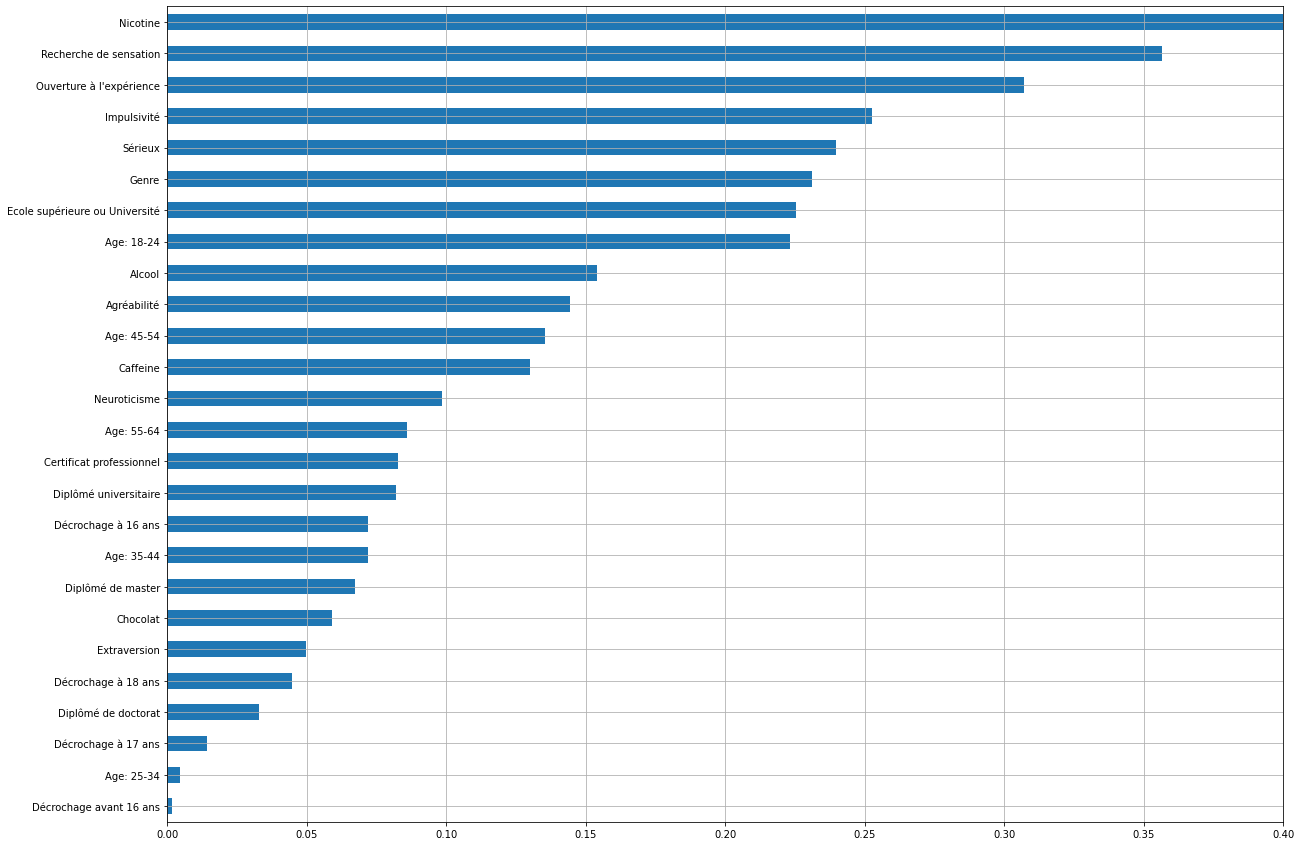

In [102]:
cannabis_corr = oh_data.drop(autres_drogues,axis=1).corr()['Cannabis']
filt = cannabis_corr.apply(lambda x : x != 1)
cannabis_corr=abs(cannabis_corr[filt]).sort_values()
cannabis_corr.plot.barh(figsize=(20,15), xlim=(0,0.4), 
                                                    xticks=np.linspace(0,0.5,11),
                                                   grid=True)
plt.show()


In [103]:
cannabis_corr[:12]

Décrochage avant 16 ans     0.001707
Age: 25-34                  0.004762
Décrochage à 17 ans         0.014399
Diplômé de doctorat         0.032780
Décrochage à 18 ans         0.044781
Extraversion                0.049673
Chocolat                    0.059199
Diplômé de master           0.067320
Age: 35-44                  0.071881
Décrochage à 16 ans         0.071900
Diplômé universitaire       0.082135
Certificat professionnel    0.082789
Name: Cannabis, dtype: float64

In [104]:
improved_data=oh_data.drop(cannabis_corr[:12].index,axis=1)

In [105]:
improved_data.head()

,Genre,Neuroticisme,Ouverture à l'expérience,Agréabilité,Sérieux,Impulsivité,Recherche de sensation,Alcool,Amphetamine,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Substance psychoactive,LSD,Methadone,Champignon hallucinogène,Nicotine,Substance Volatile,Age: 18-24,Age: 45-54,Age: 55-64,Ecole supérieure ou Université
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,-0.67825,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0
3,1,-0.46725,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,-0.14882,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,0,0.73545,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0


In [106]:
X_train, X_test, y_train, y_test=preprocessing_inputs(improved_data, 'Cannabis')

#### Random Forest

              precision    recall  f1-score   support

           0       0.73      0.54      0.62       125
           1       0.88      0.94      0.91       439

    accuracy                           0.85       564
   macro avg       0.80      0.74      0.76       564
weighted avg       0.84      0.85      0.84       564



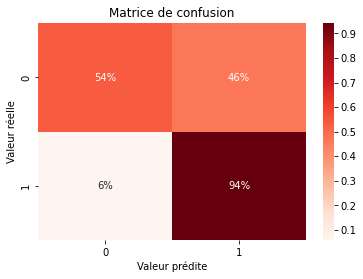

In [107]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 21)
RF.fit(X_train,y_train)
report_performance(RF)

#### Grid search


Best params:
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
Train f1 score: 0.911
Test f1 score: 0.914
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       125
           1       0.87      0.97      0.91       439

    accuracy                           0.86       564
   macro avg       0.83      0.72      0.76       564
weighted avg       0.85      0.86      0.84       564



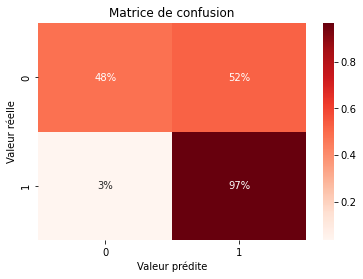

In [108]:
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_gs = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
RF_grid_result = RF_gs.fit(X_train, y_train)
# Résultats
RF_grid_score=RF_grid_result.score(X_test, y_test)
print('\nBest params:\n', RF_grid_result.best_params_)
print('Train f1 score: %.3f' % RF_grid_result.best_score_)
print('Test f1 score: %.3f' % RF_grid_score)
report_performance(RF_gs)

In [109]:
RF_pred_proba=RF_gs.predict_proba(X_test)[:,1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_pred_proba)
roc_auc_RF = auc(fpr_RF, tpr_RF)

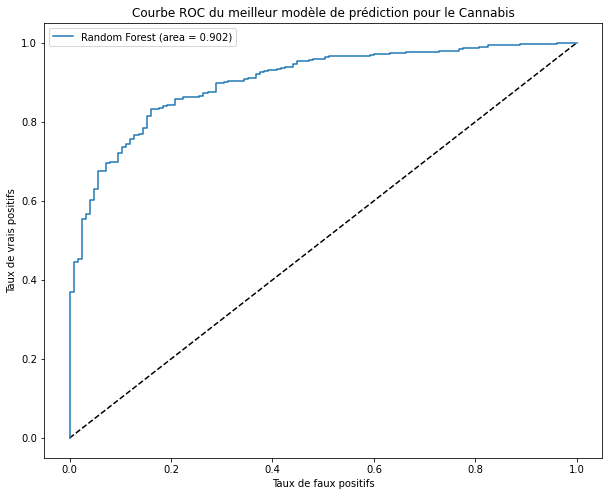

In [110]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.3f)' % roc_auc_RF)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC du meilleur modèle de prédiction pour le Cannabis')
plt.legend(loc='best')
plt.show()